# Project 6 Homework

1. Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain how variables in each set of data are related. Plot each set using the scatter plot function and the line graph function. For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at FRED and use the code associated with the data. For example, the CPI measure that includes urban items is identified by the code, CPIAUCSL.

In [1]:
import pandas as pd
import pandas_datareader as web
import datetime
from datlib.FRED import *
from datlib.plots import *
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import datetime
start = datetime.datetime(2000,1,1)
end = datetime.datetime.today()

cpi_codes = {"Consumer Price Index for All Urban Consumers: All Items in U.S. City Average":"CPIAUCSL",
              "Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average":"CPILFESL",
             }

cpi_data = gather_data(data_codes = cpi_codes, 
                   start = start, 
                   end = end,
                   freq = "M")

cpi_data

,Consumer Price Index for All Urban Consumers: All Items in U.S. City Average,Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average
DATE,,
2000-01-31,169.300,179.300
2000-02-29,170.000,179.400
2000-03-31,171.000,180.000
2000-04-30,170.900,180.300
2000-05-31,171.200,180.700
...,...,...
2021-05-31,268.551,275.718
2021-06-30,270.981,278.140
2021-07-31,272.265,279.054


### These variables are measures of consumer prices and they are increasing as the rate of prices increase, inflation. Both of these variables measure that and they are related because one takes out food and energy prices.

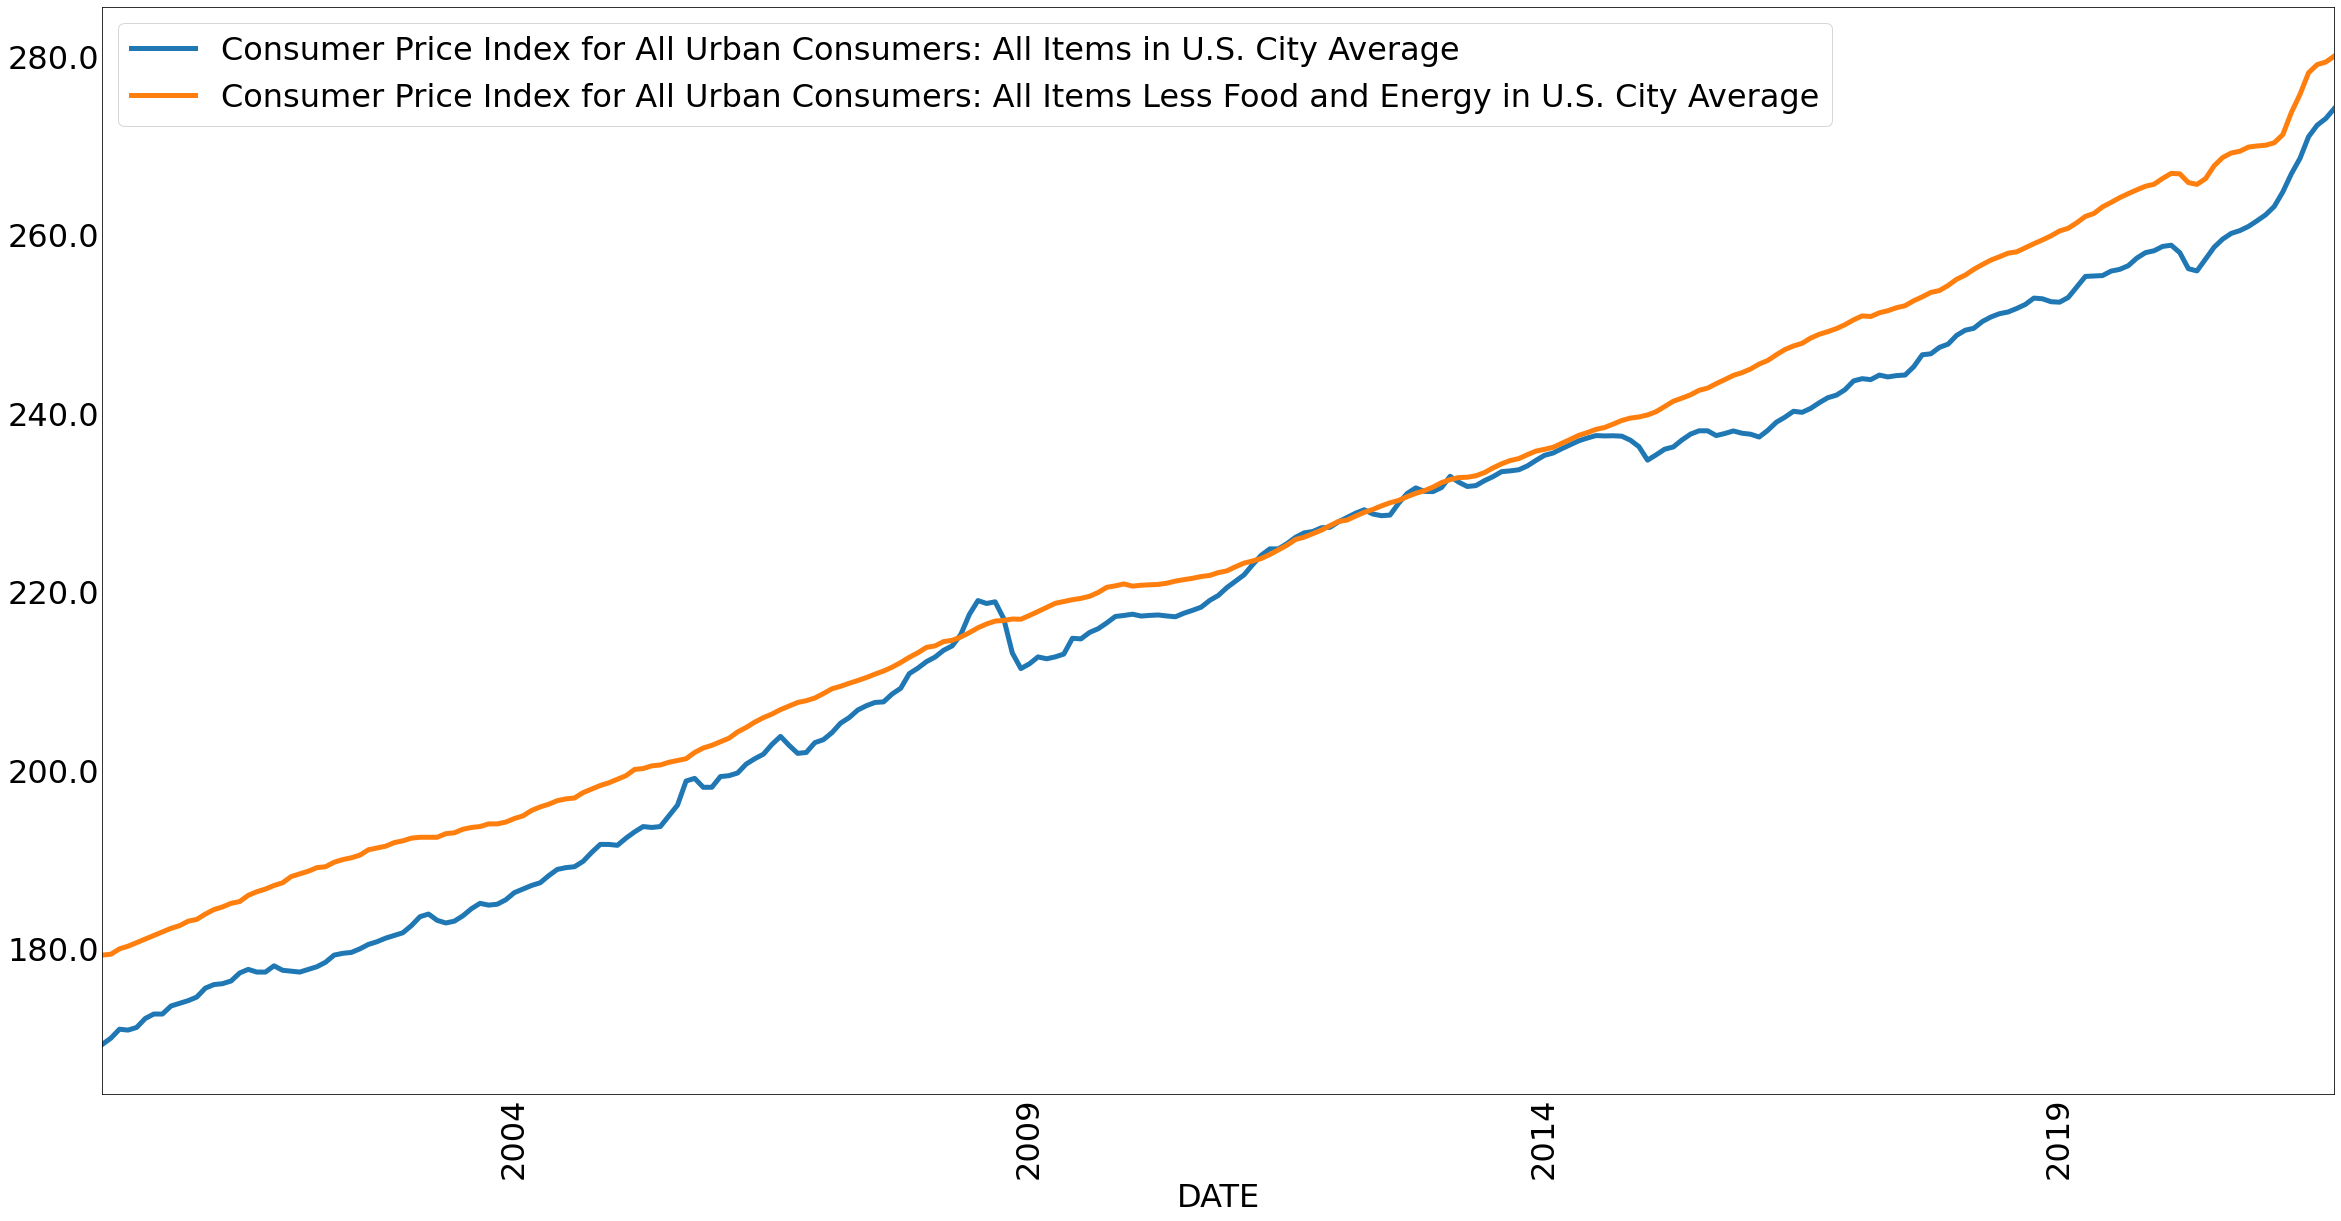

In [2]:
plt.rcParams.update({"font.size":32})
pp = PdfPages("CPI.pdf")
plot_lines(cpi_data, 
           linewidth = 5, 
           figsize = (40, 20), 
           pp = pp)

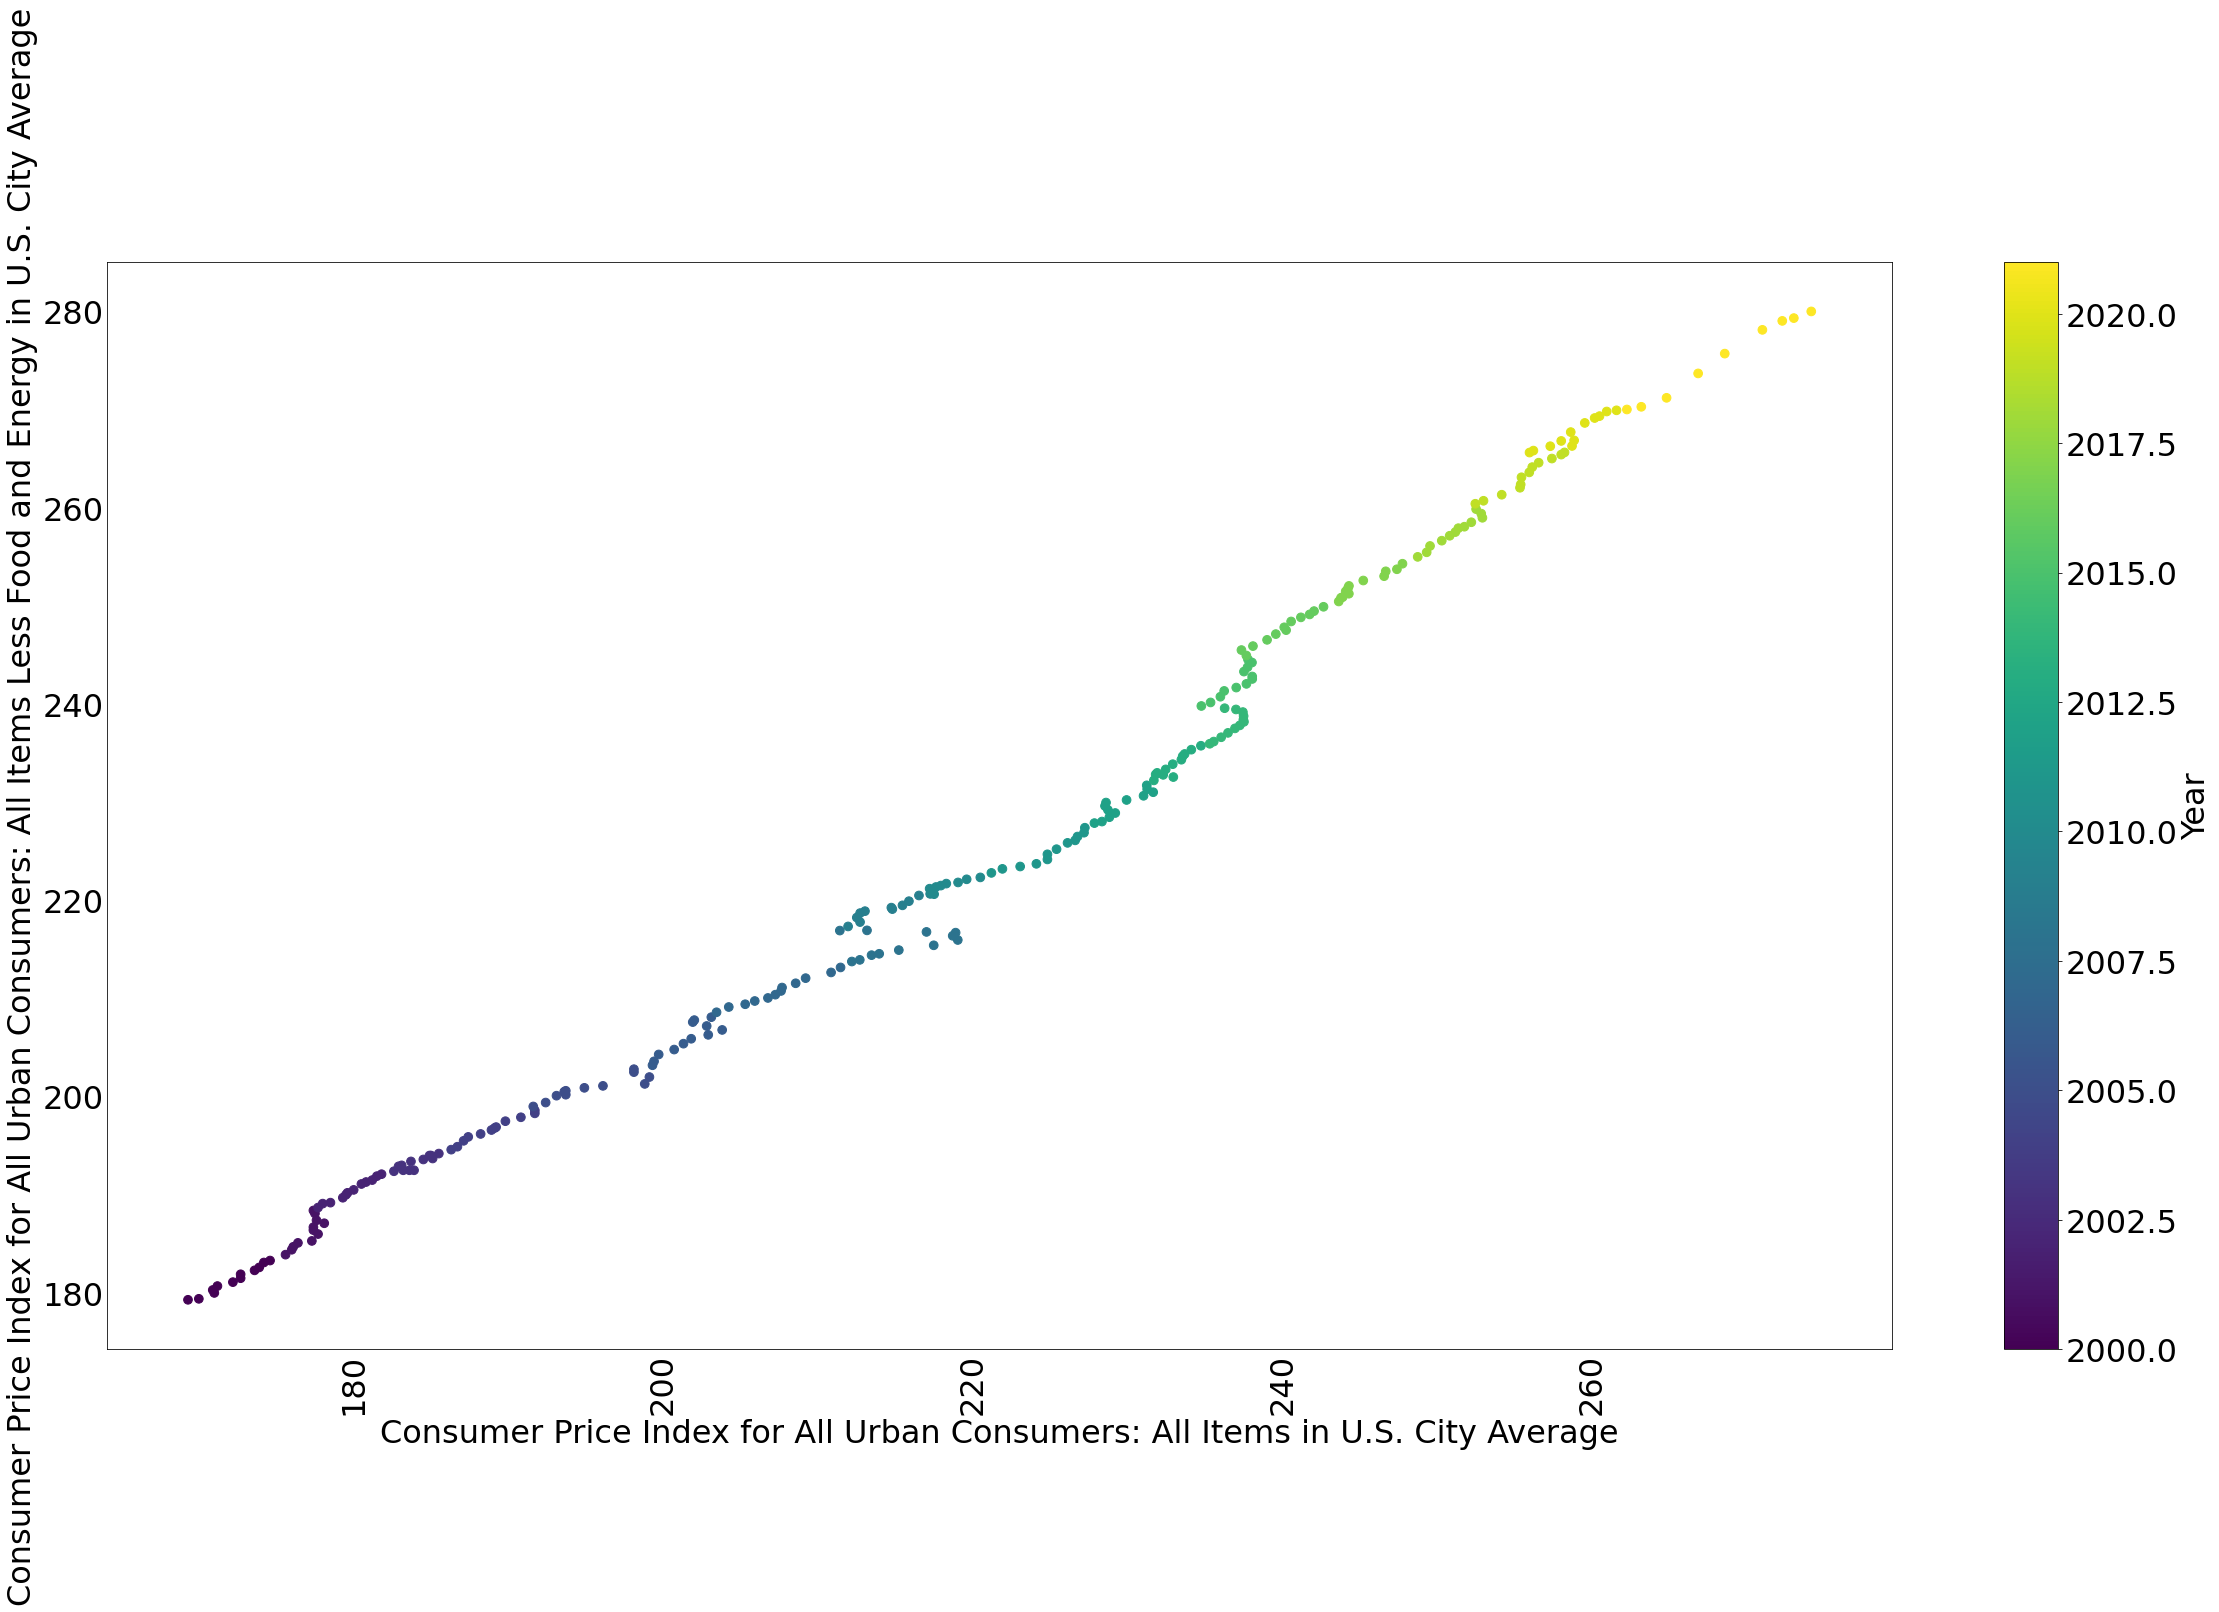

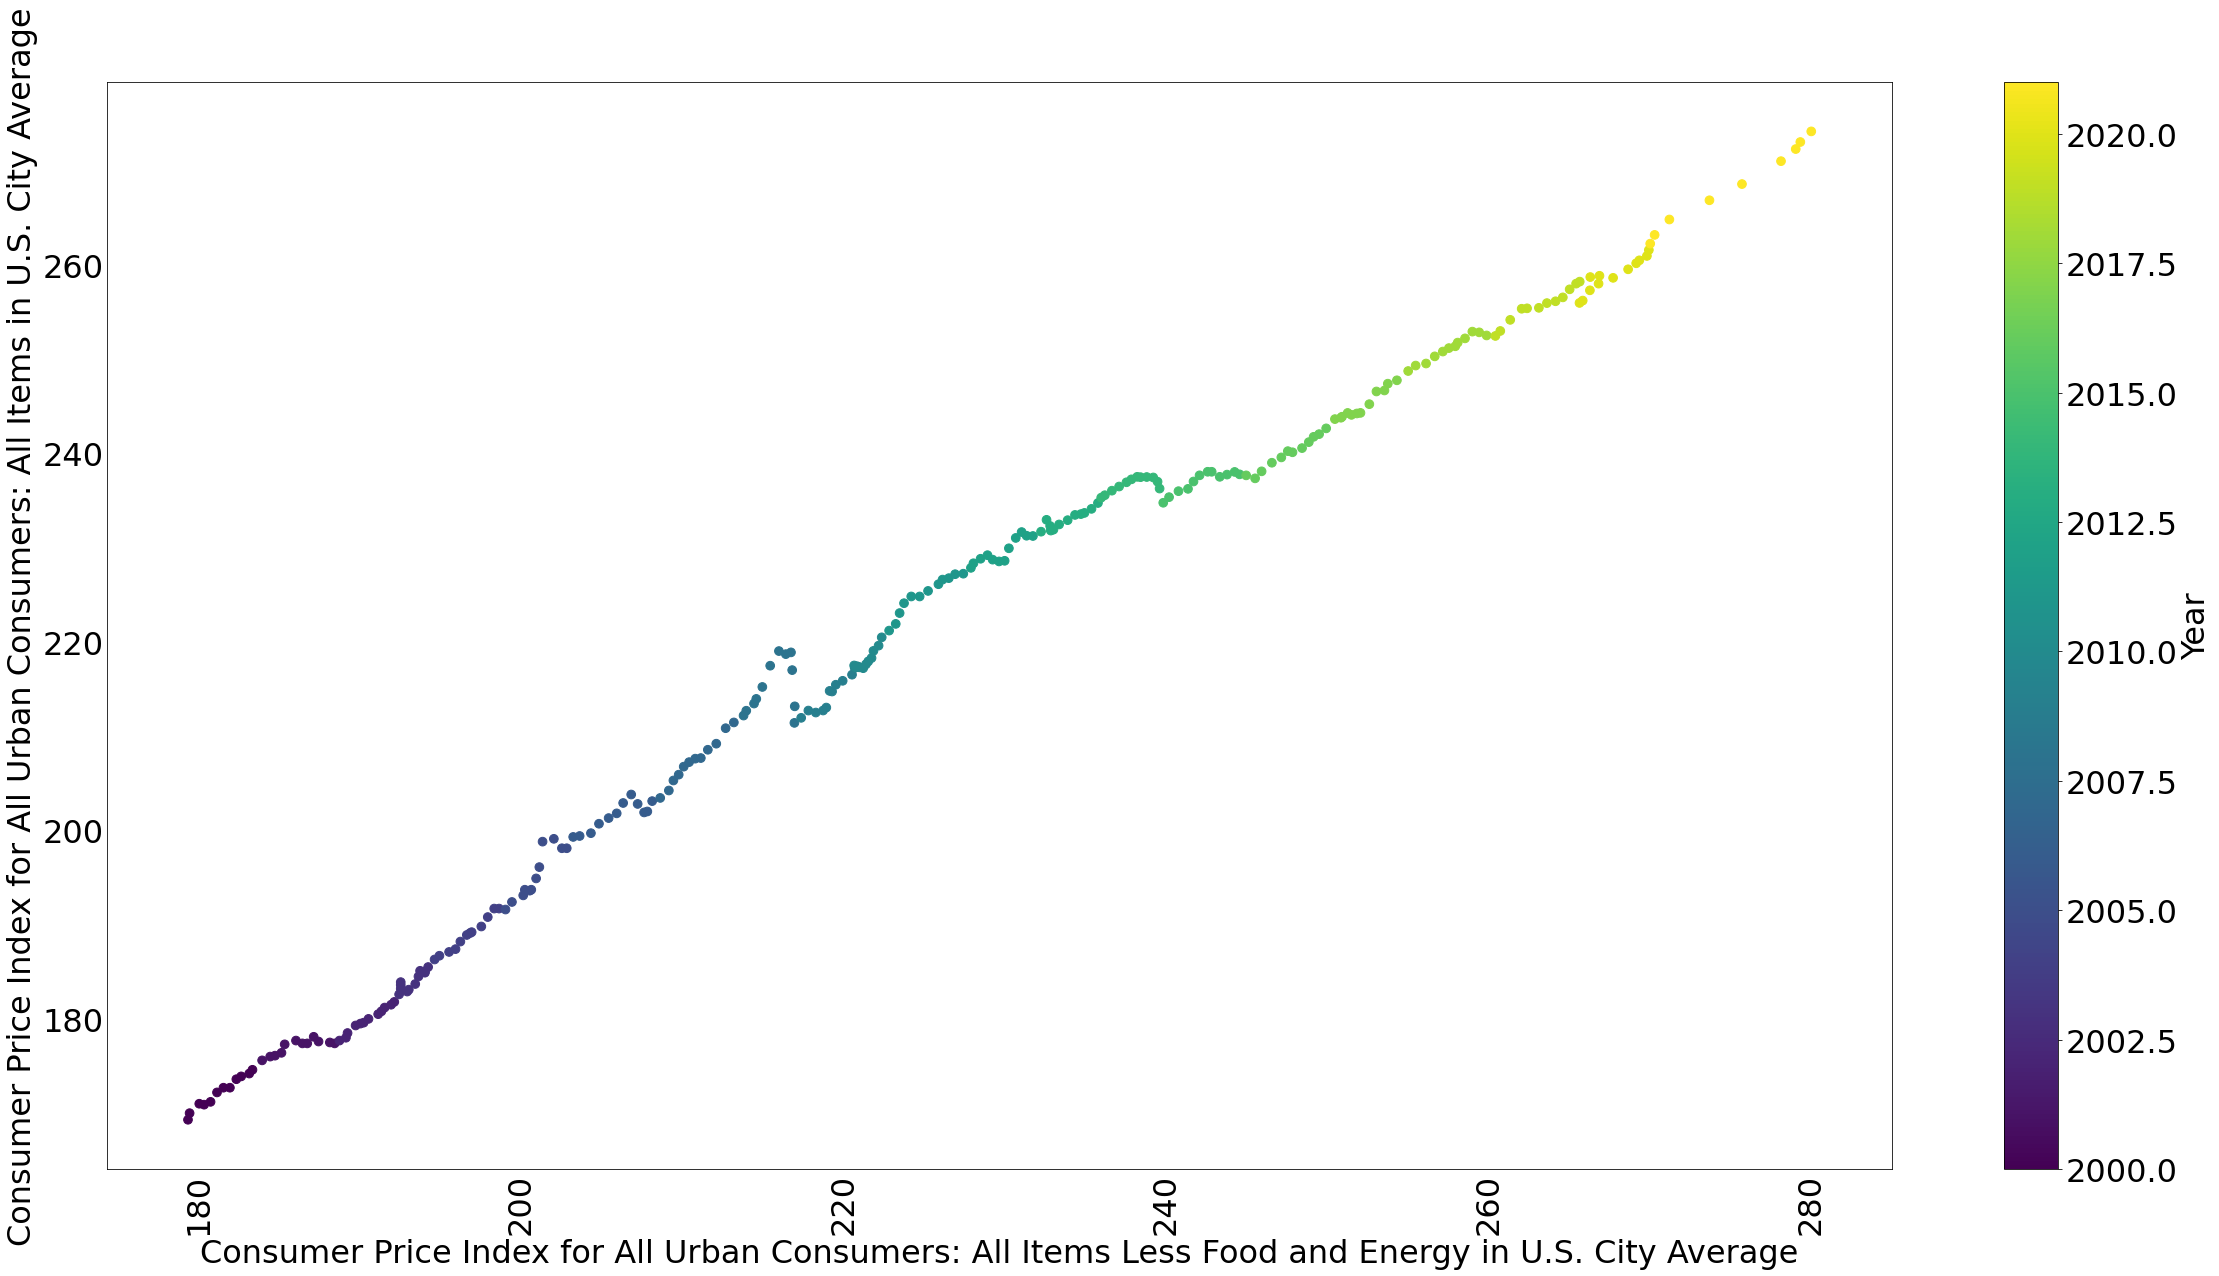

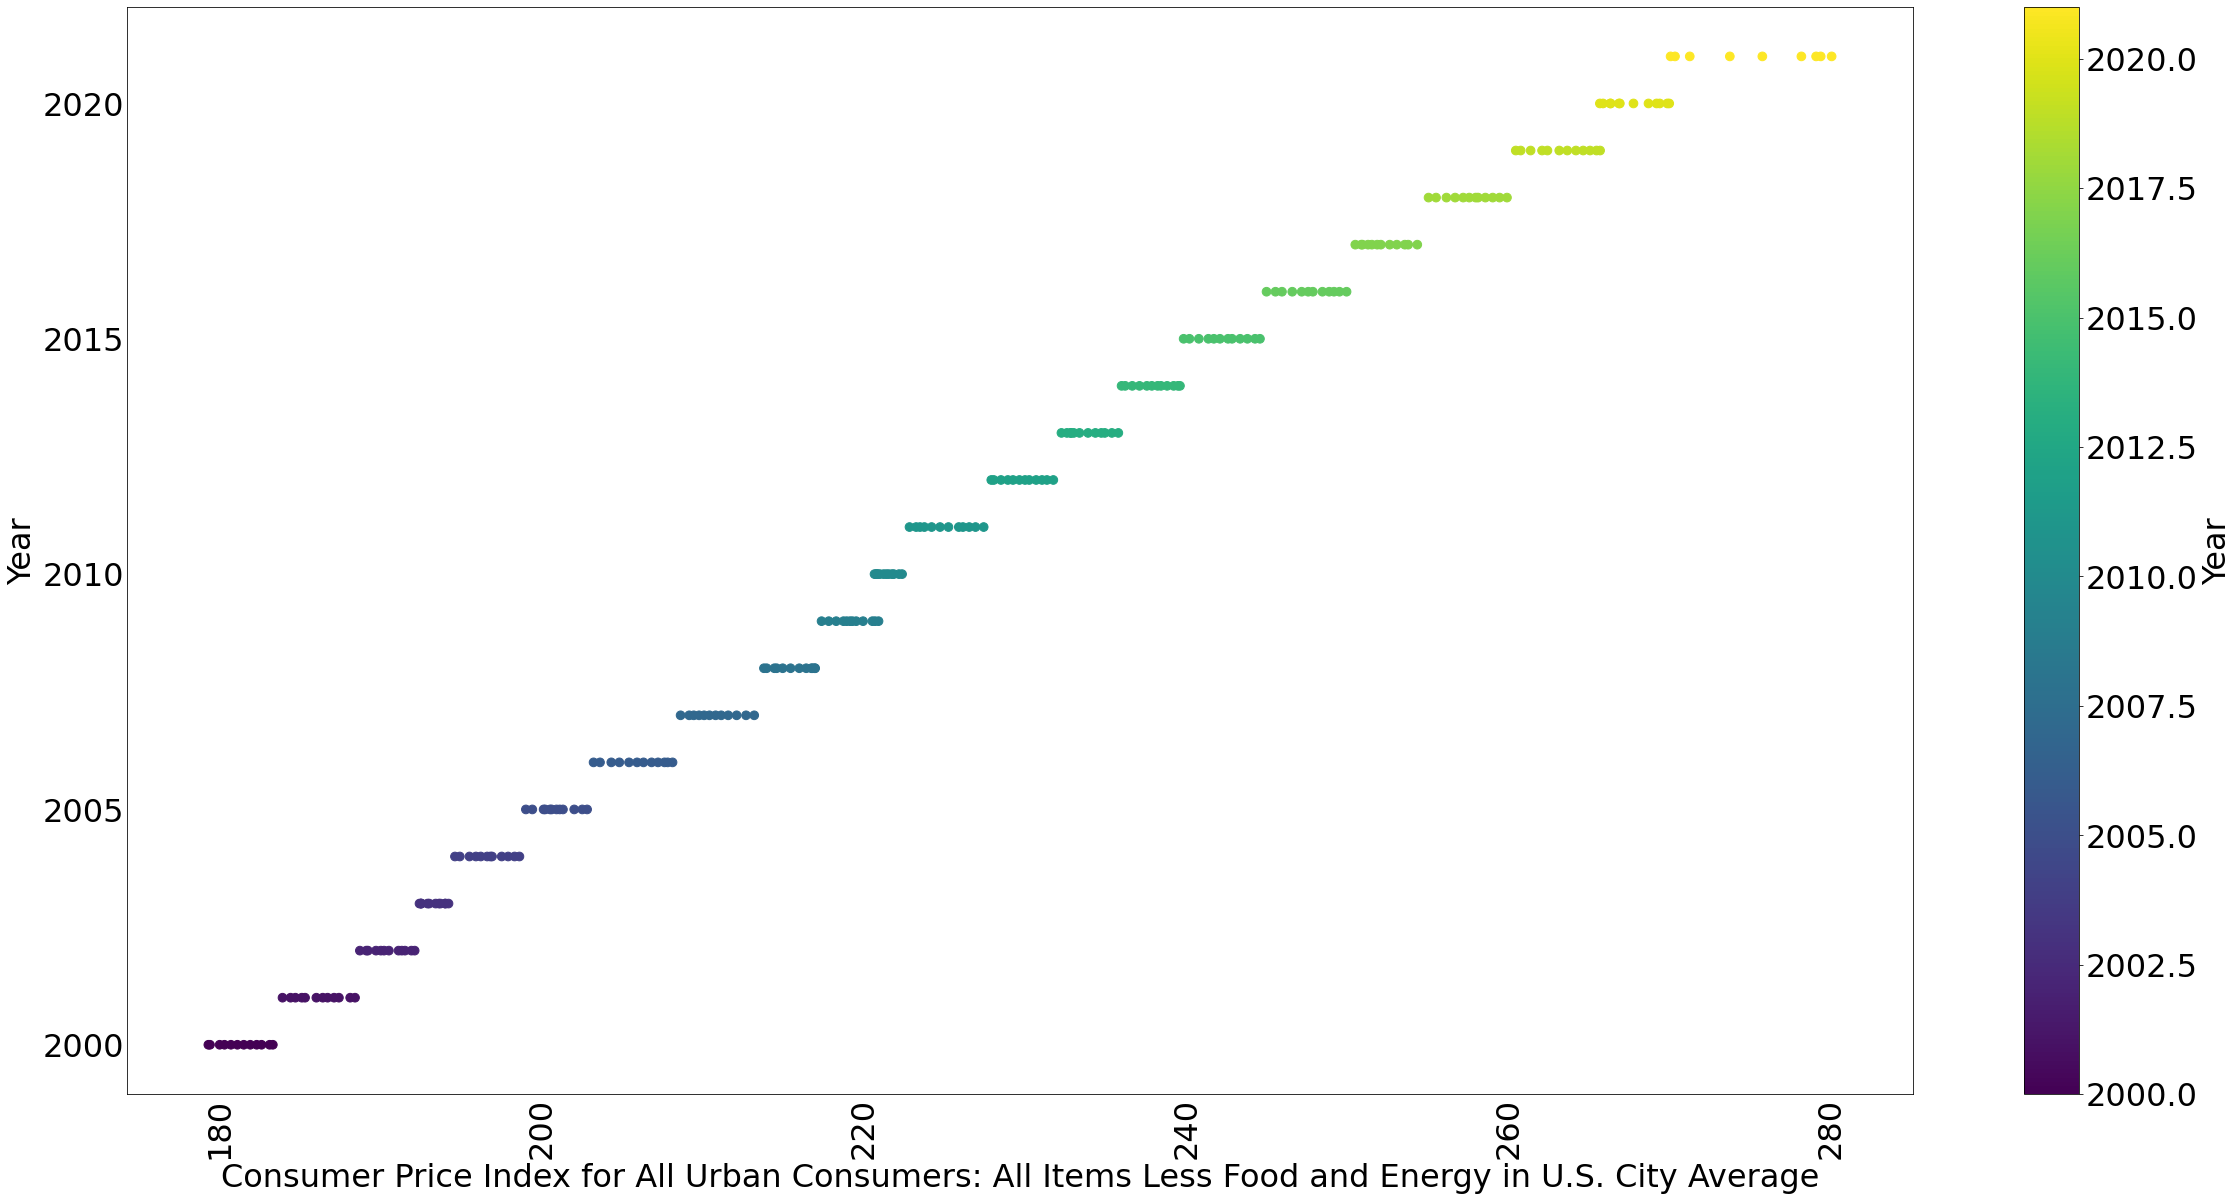

In [3]:
plot_scatter(cpi_data,
             figsize = (40,20),
             pp = pp)

In [4]:
pp.close()

### These three variables are related becasue the 10 year treasury yield is affected by the Federal Reserves federal funds rate lowering or raising. The price deflator increasing is typically a reason that the Federal Reserve would raise interest rates or decrease interest rates. 

In [5]:
start = datetime.datetime(1970,1,1)
end = datetime.datetime.today()

rate_codes = {"Federal Funds Effective Rate":"DFF",
             "10 Year Treasury Yield":"DGS10",
             "Gross Domestic Product: Implicit Price Deflator":"A191RI1Q225SBEA",
             }

rate_data = gather_data(data_codes = rate_codes, 
                   start = start, 
                   end = end,
                   freq = "Q")

rate_data = rate_data.dropna(how = "any", axis = 0)
rate_data

,Federal Funds Effective Rate,10 Year Treasury Yield,Gross Domestic Product: Implicit Price Deflator
DATE,,,
1970-03-31,8.558889,7.375167,5.7
1970-06-30,7.883297,7.710000,5.7
1970-09-30,6.711087,7.457969,3.3
1970-12-31,5.568261,6.846066,5.4
1971-03-31,3.862778,5.999508,6.2
...,...,...,...
2020-06-30,0.058791,0.687619,-1.7
2020-09-30,0.092609,0.650625,3.7
2020-12-31,0.088804,0.864516,1.9


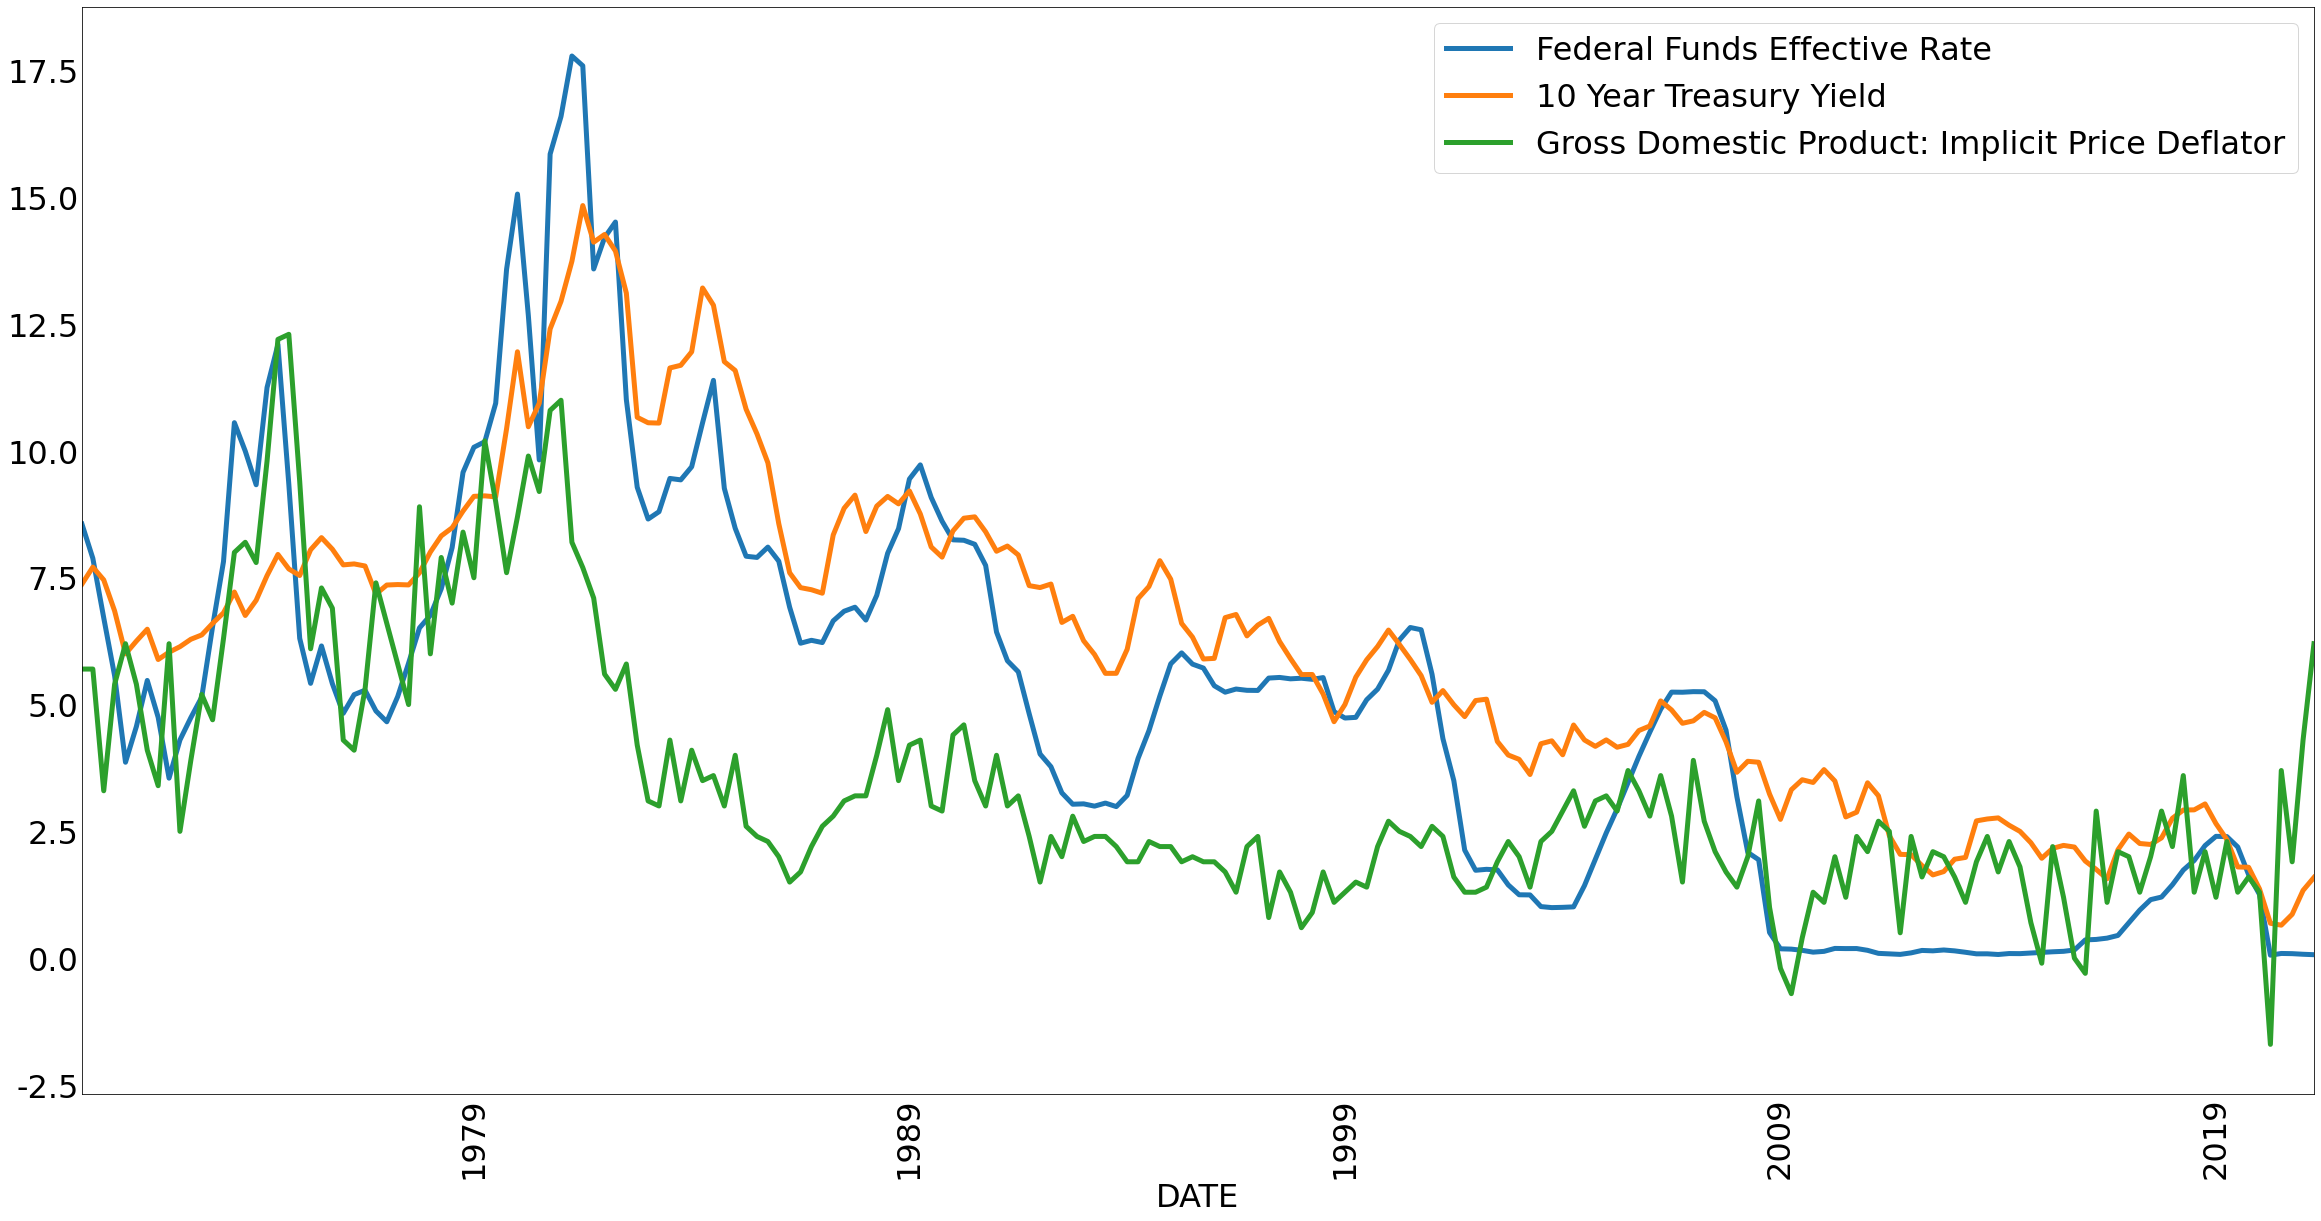

In [6]:
plt.rcParams.update({"font.size":32})
pp = PdfPages("Rates.pdf")
plot_lines(rate_data, 
           linewidth = 5, 
           figsize = (40, 20), 
           pp = pp)

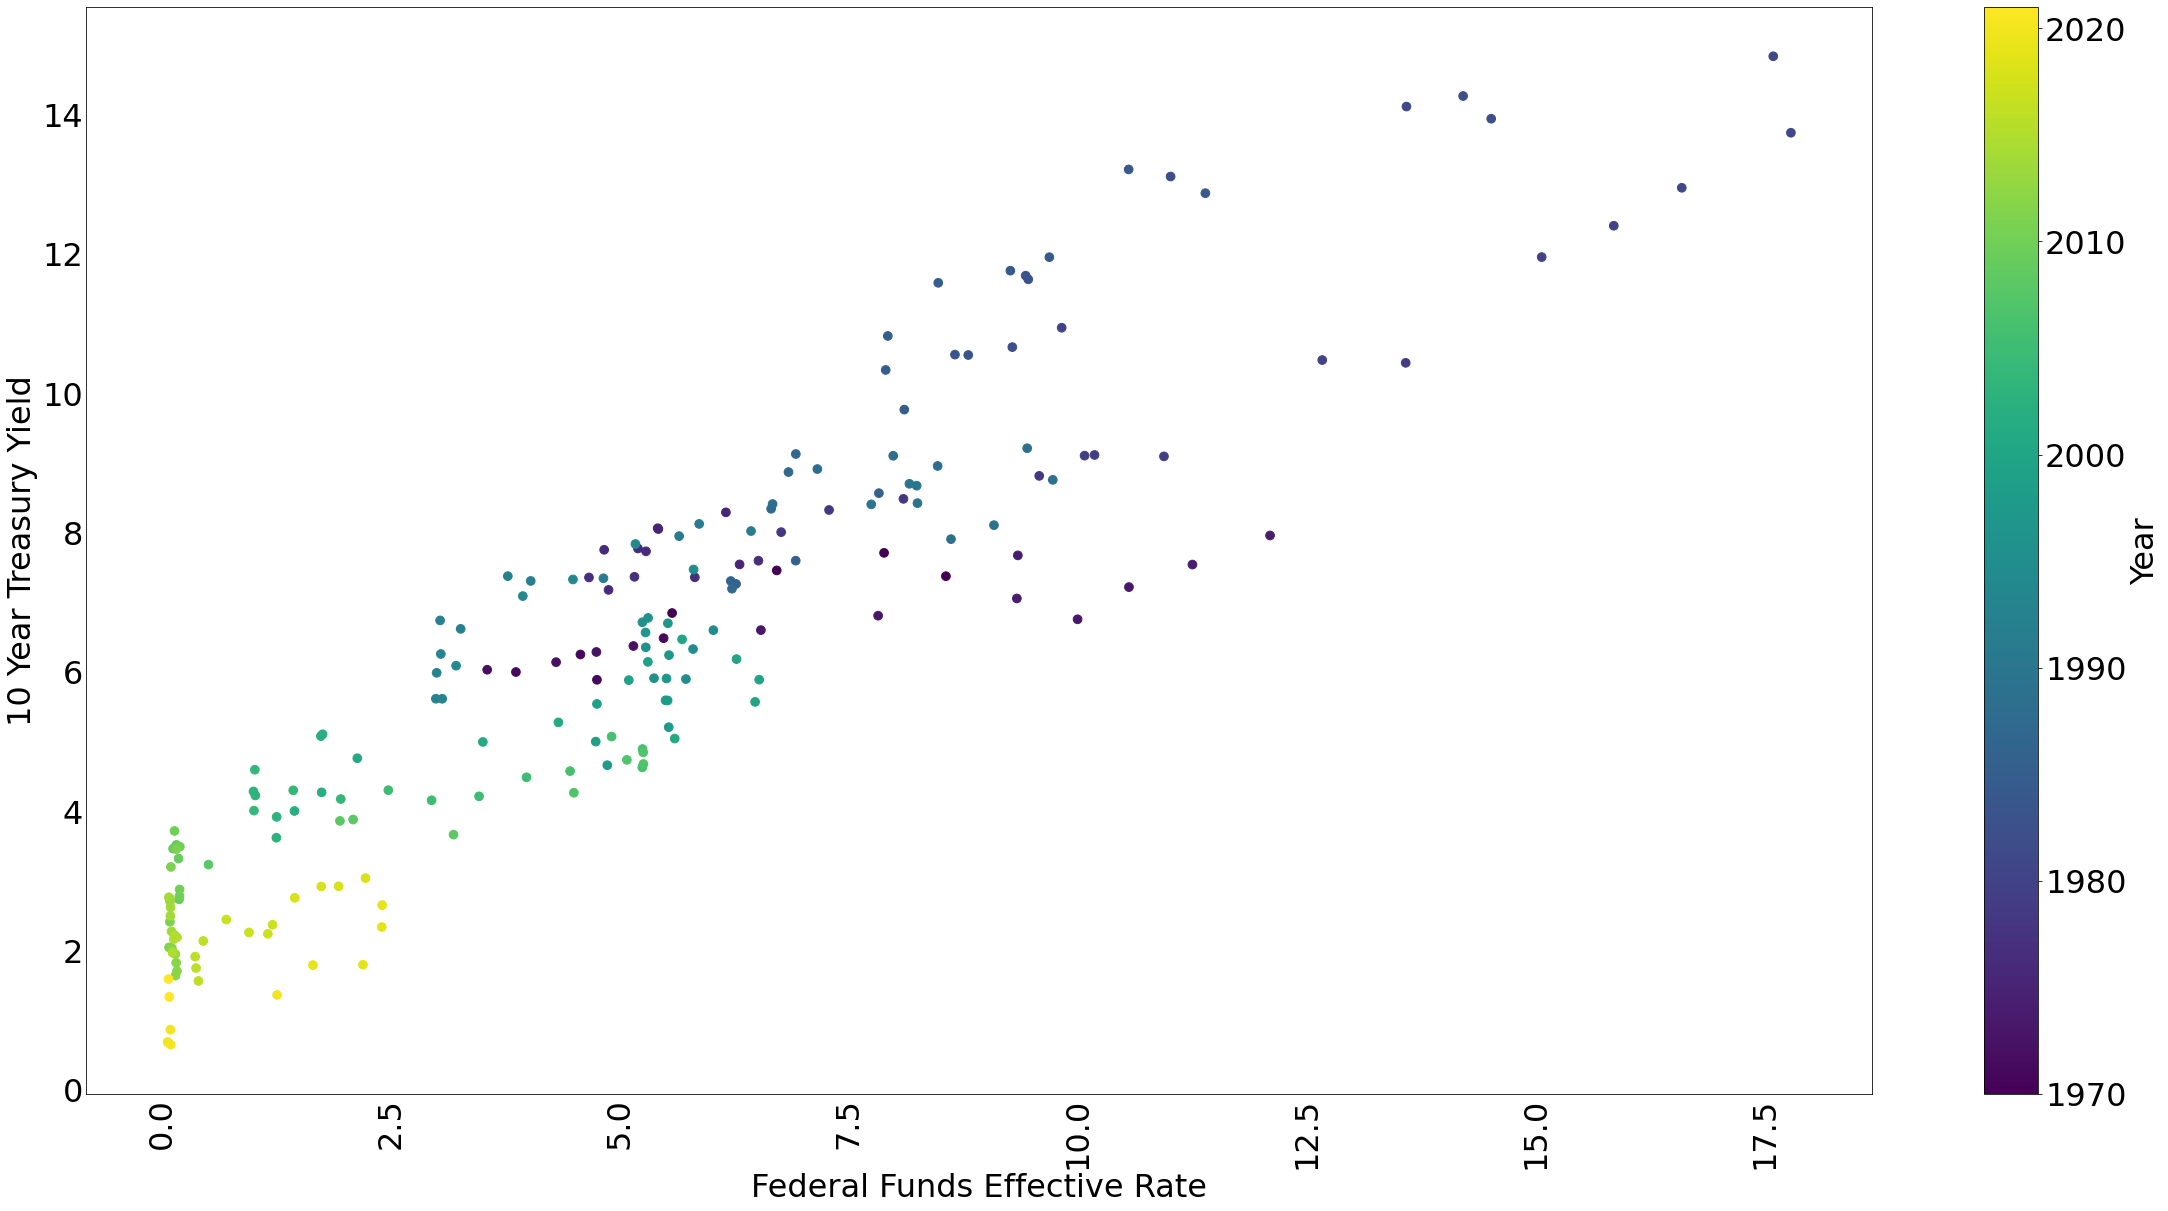

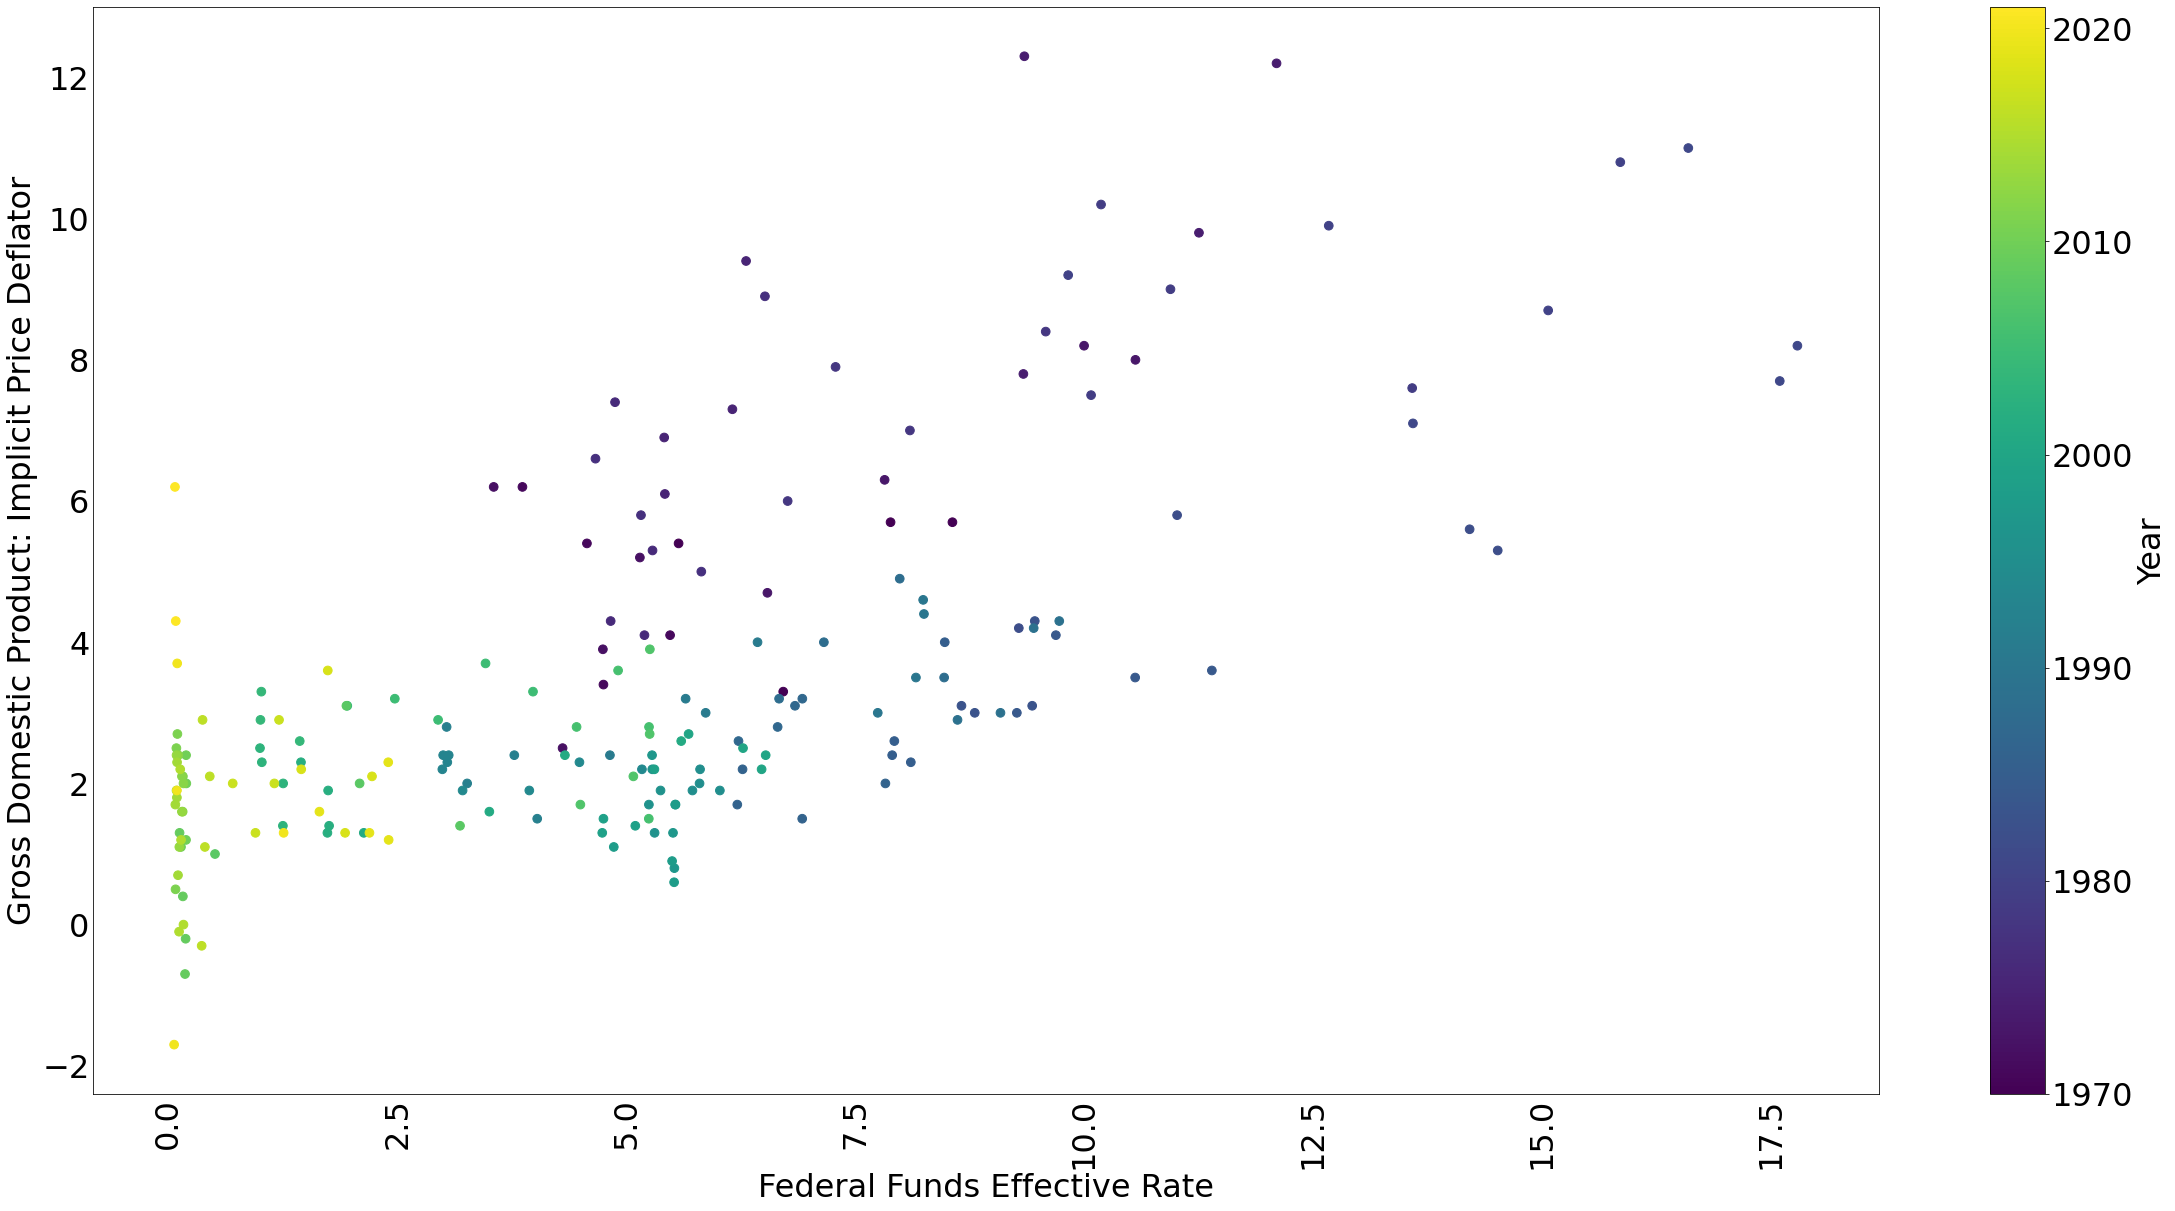

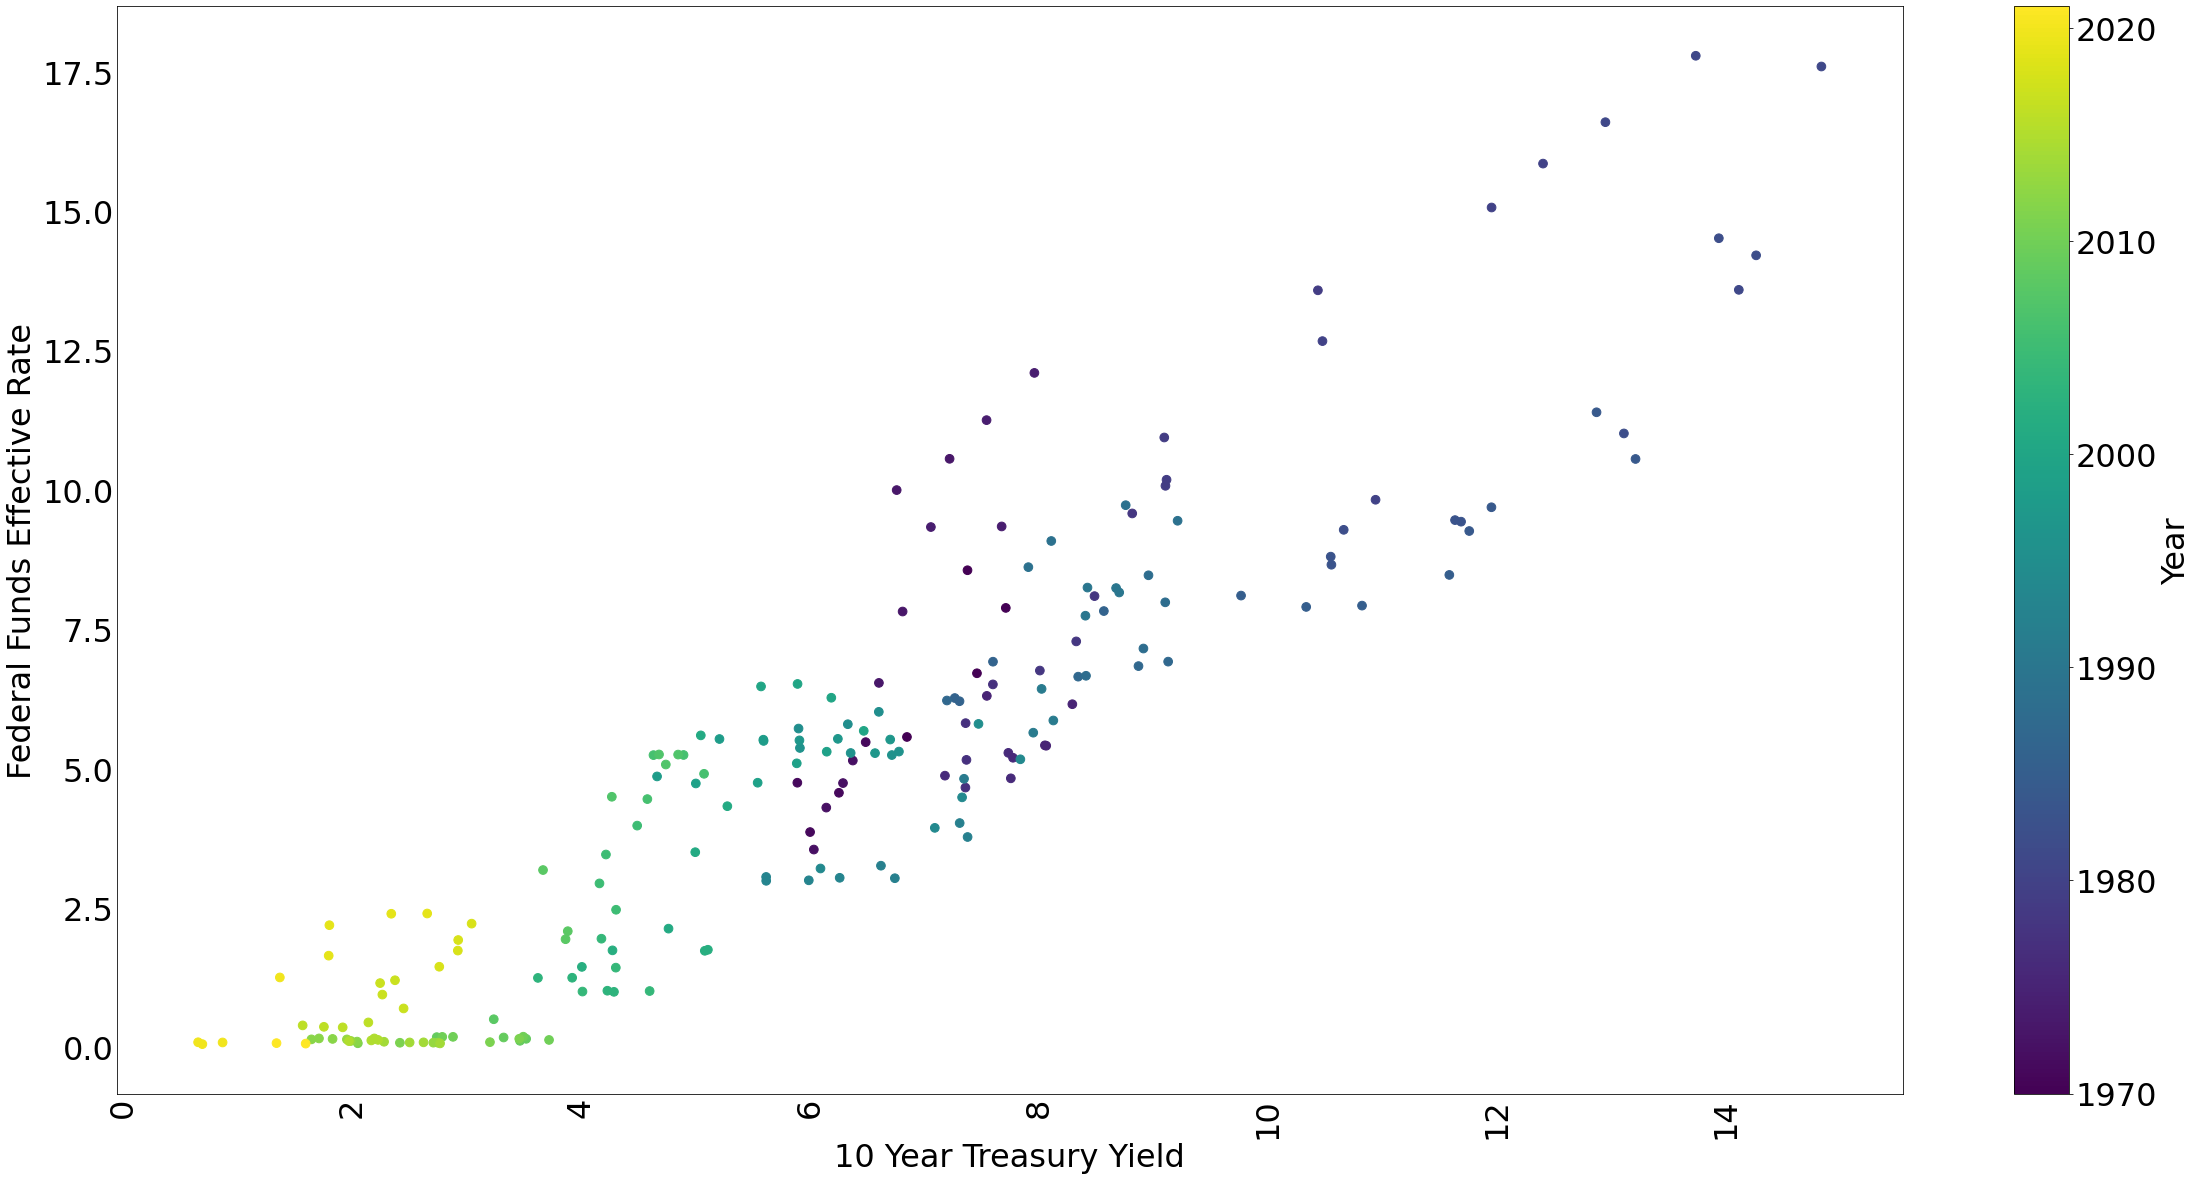

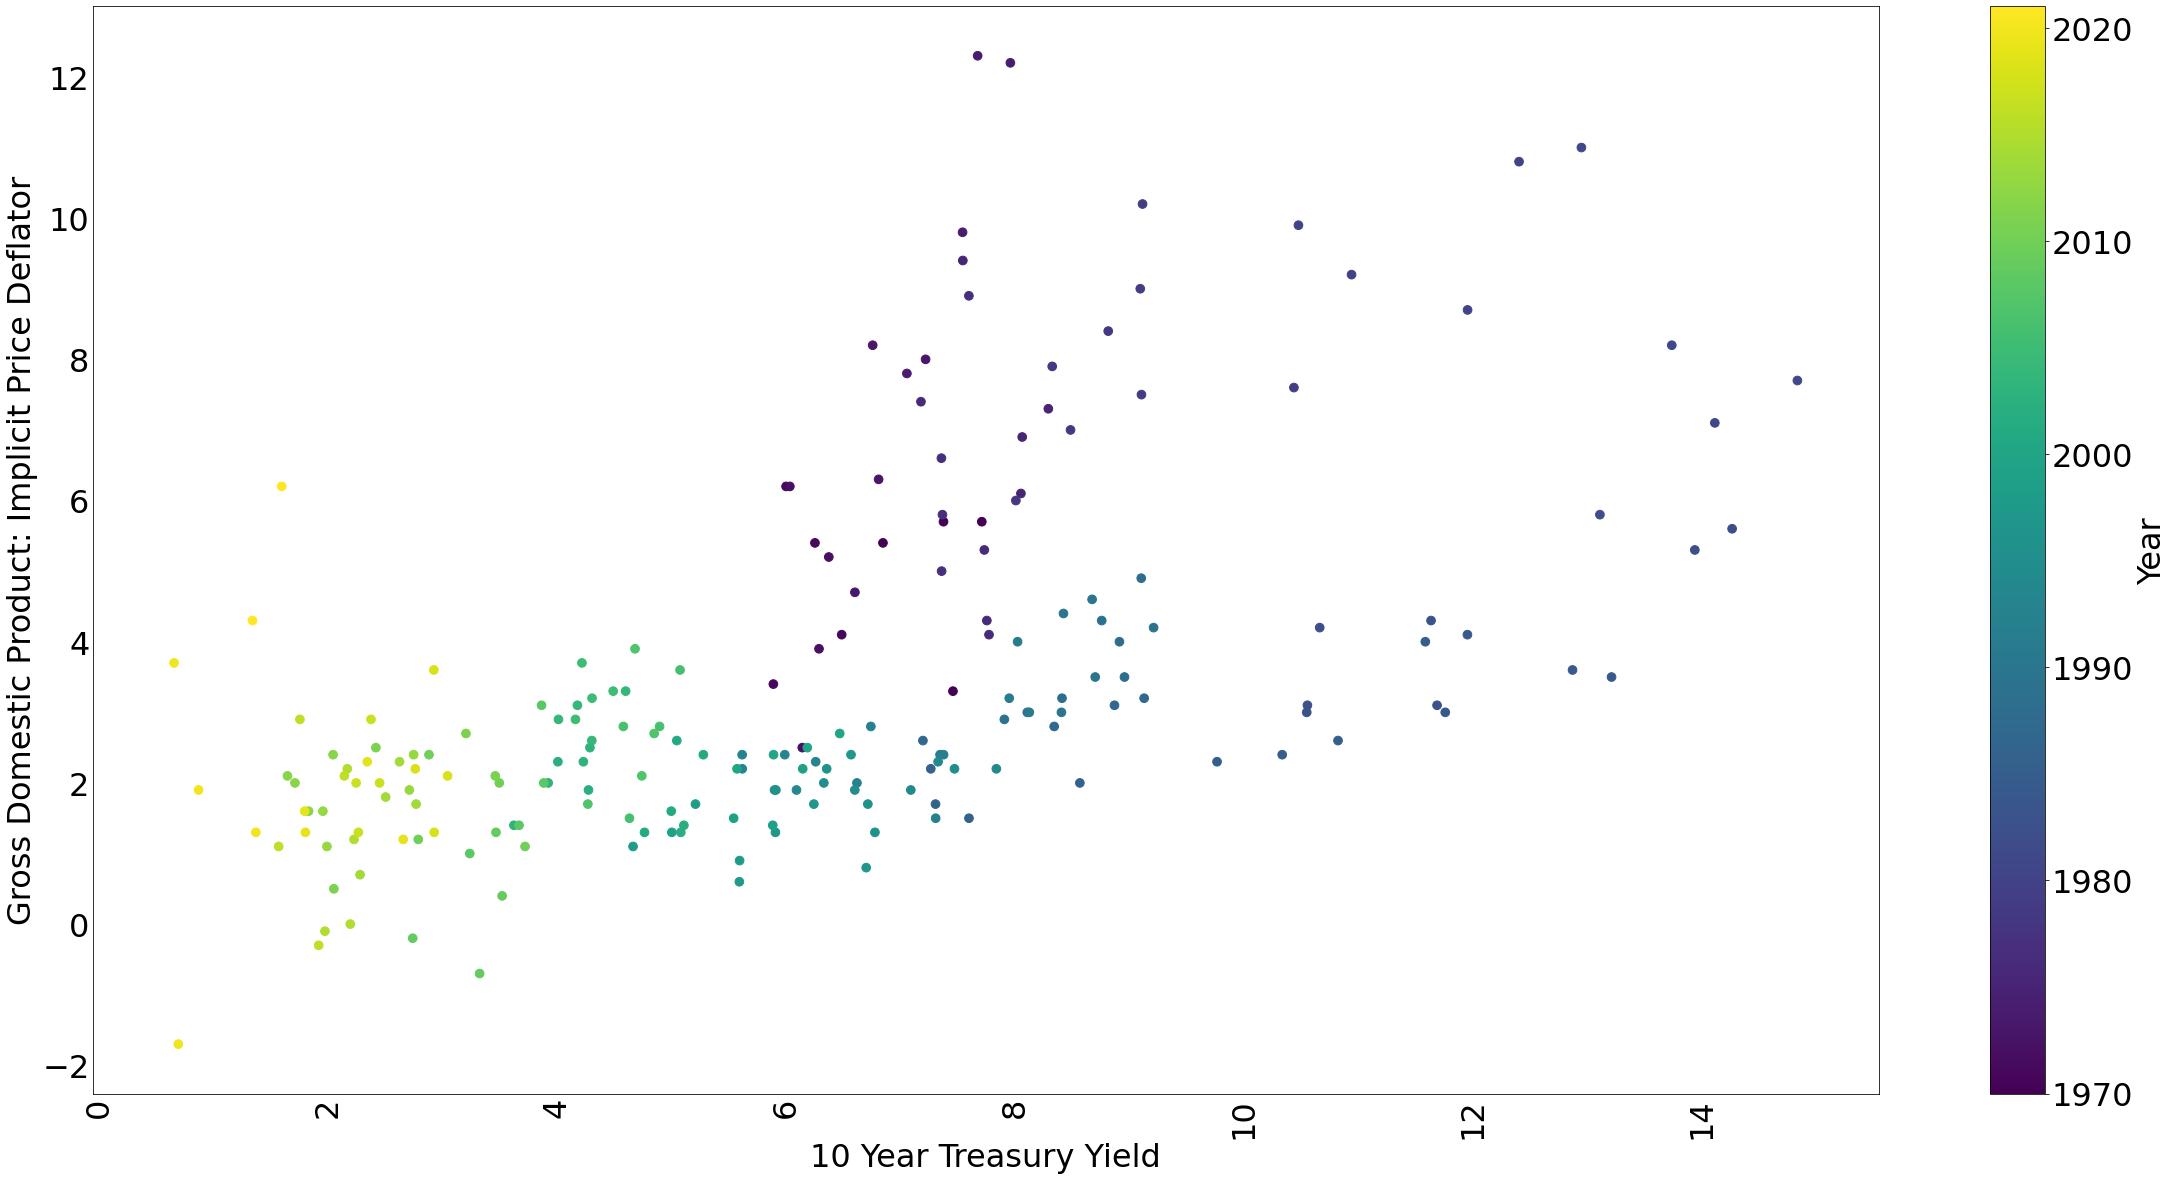

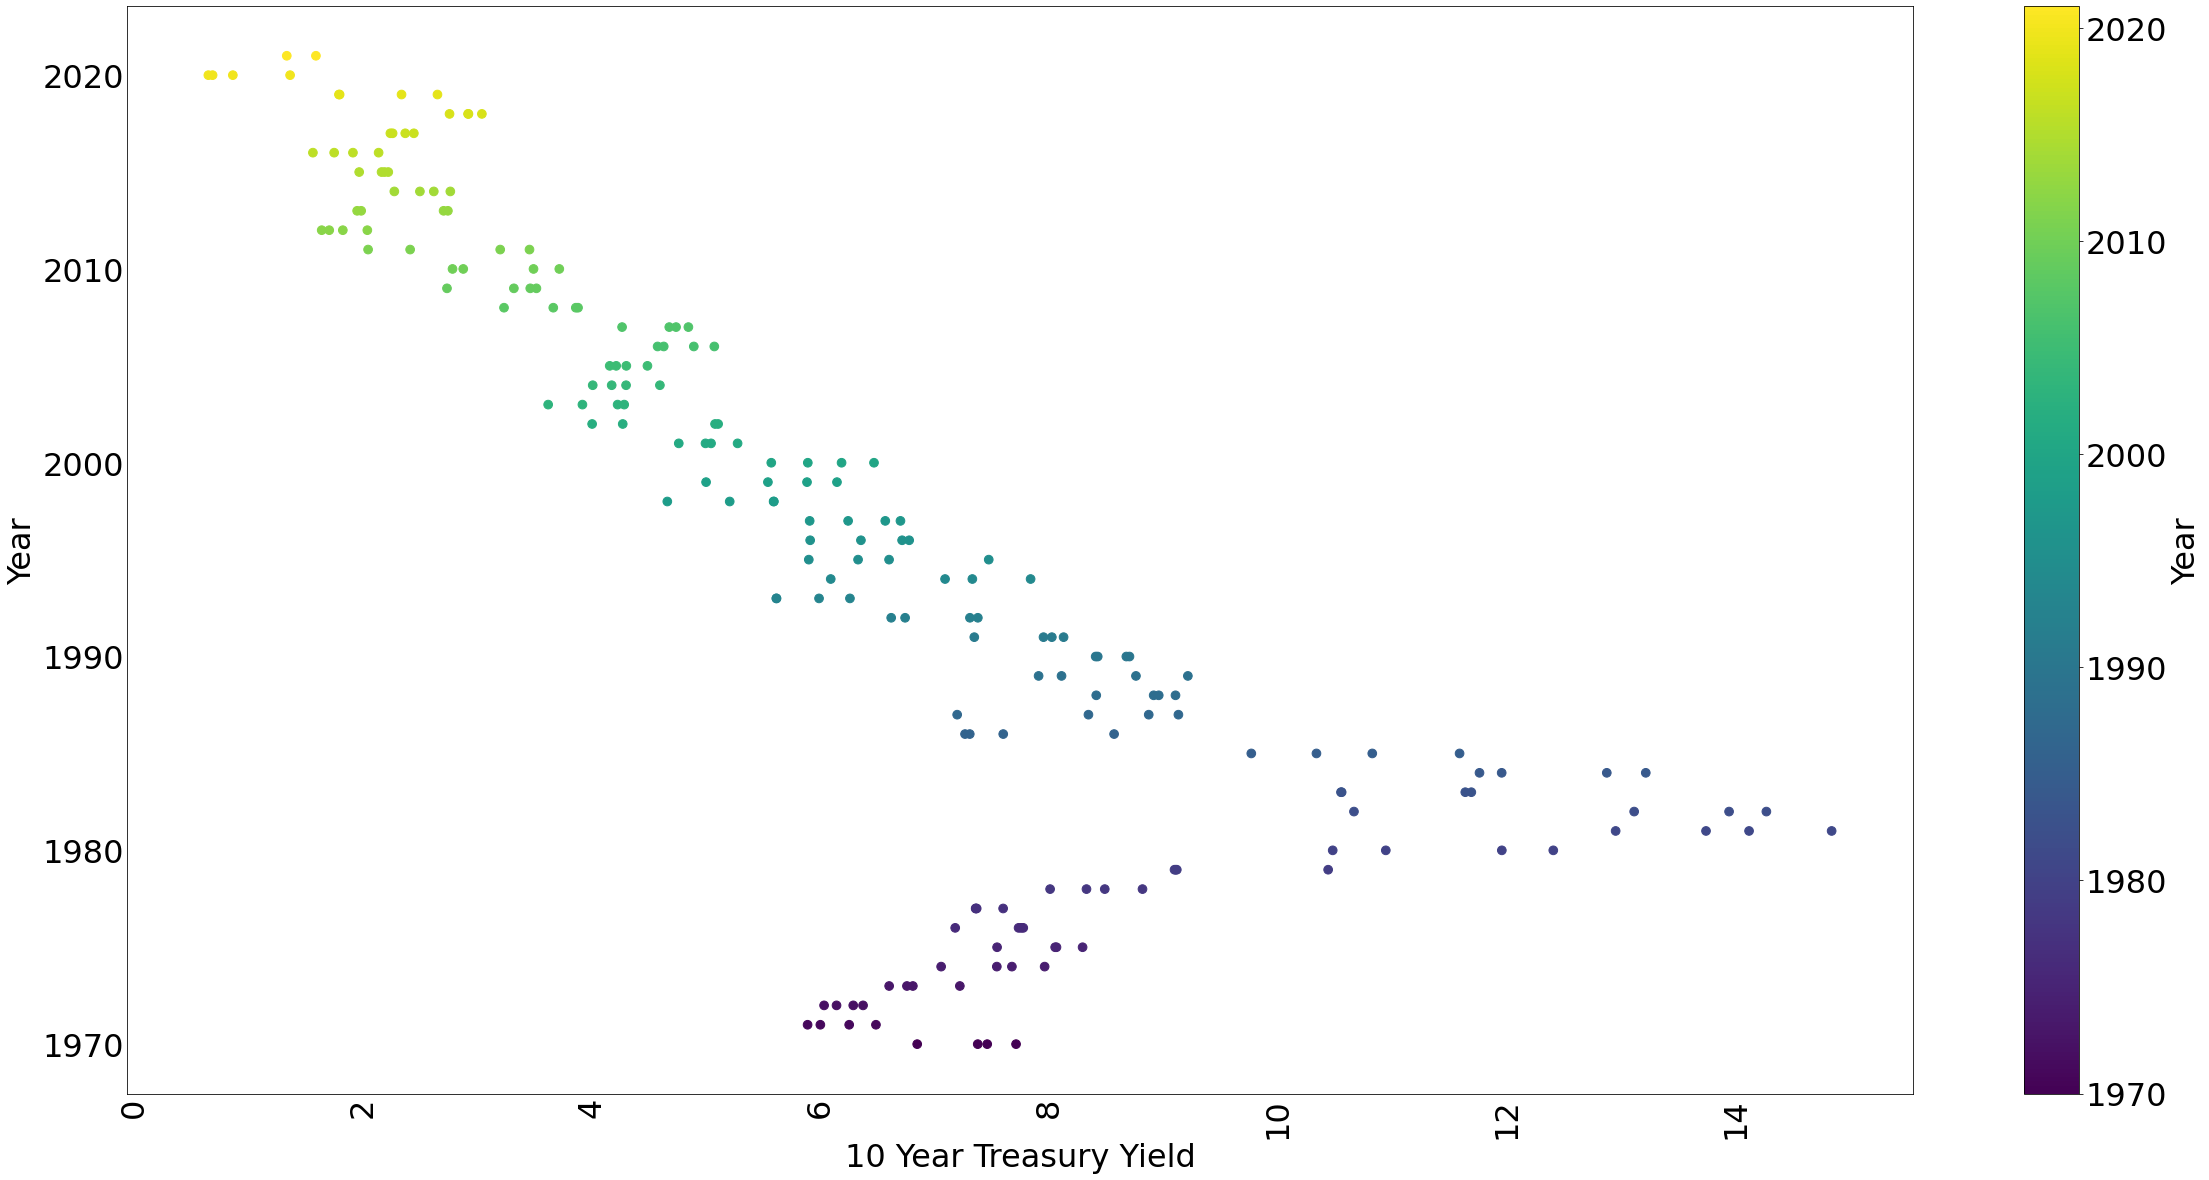

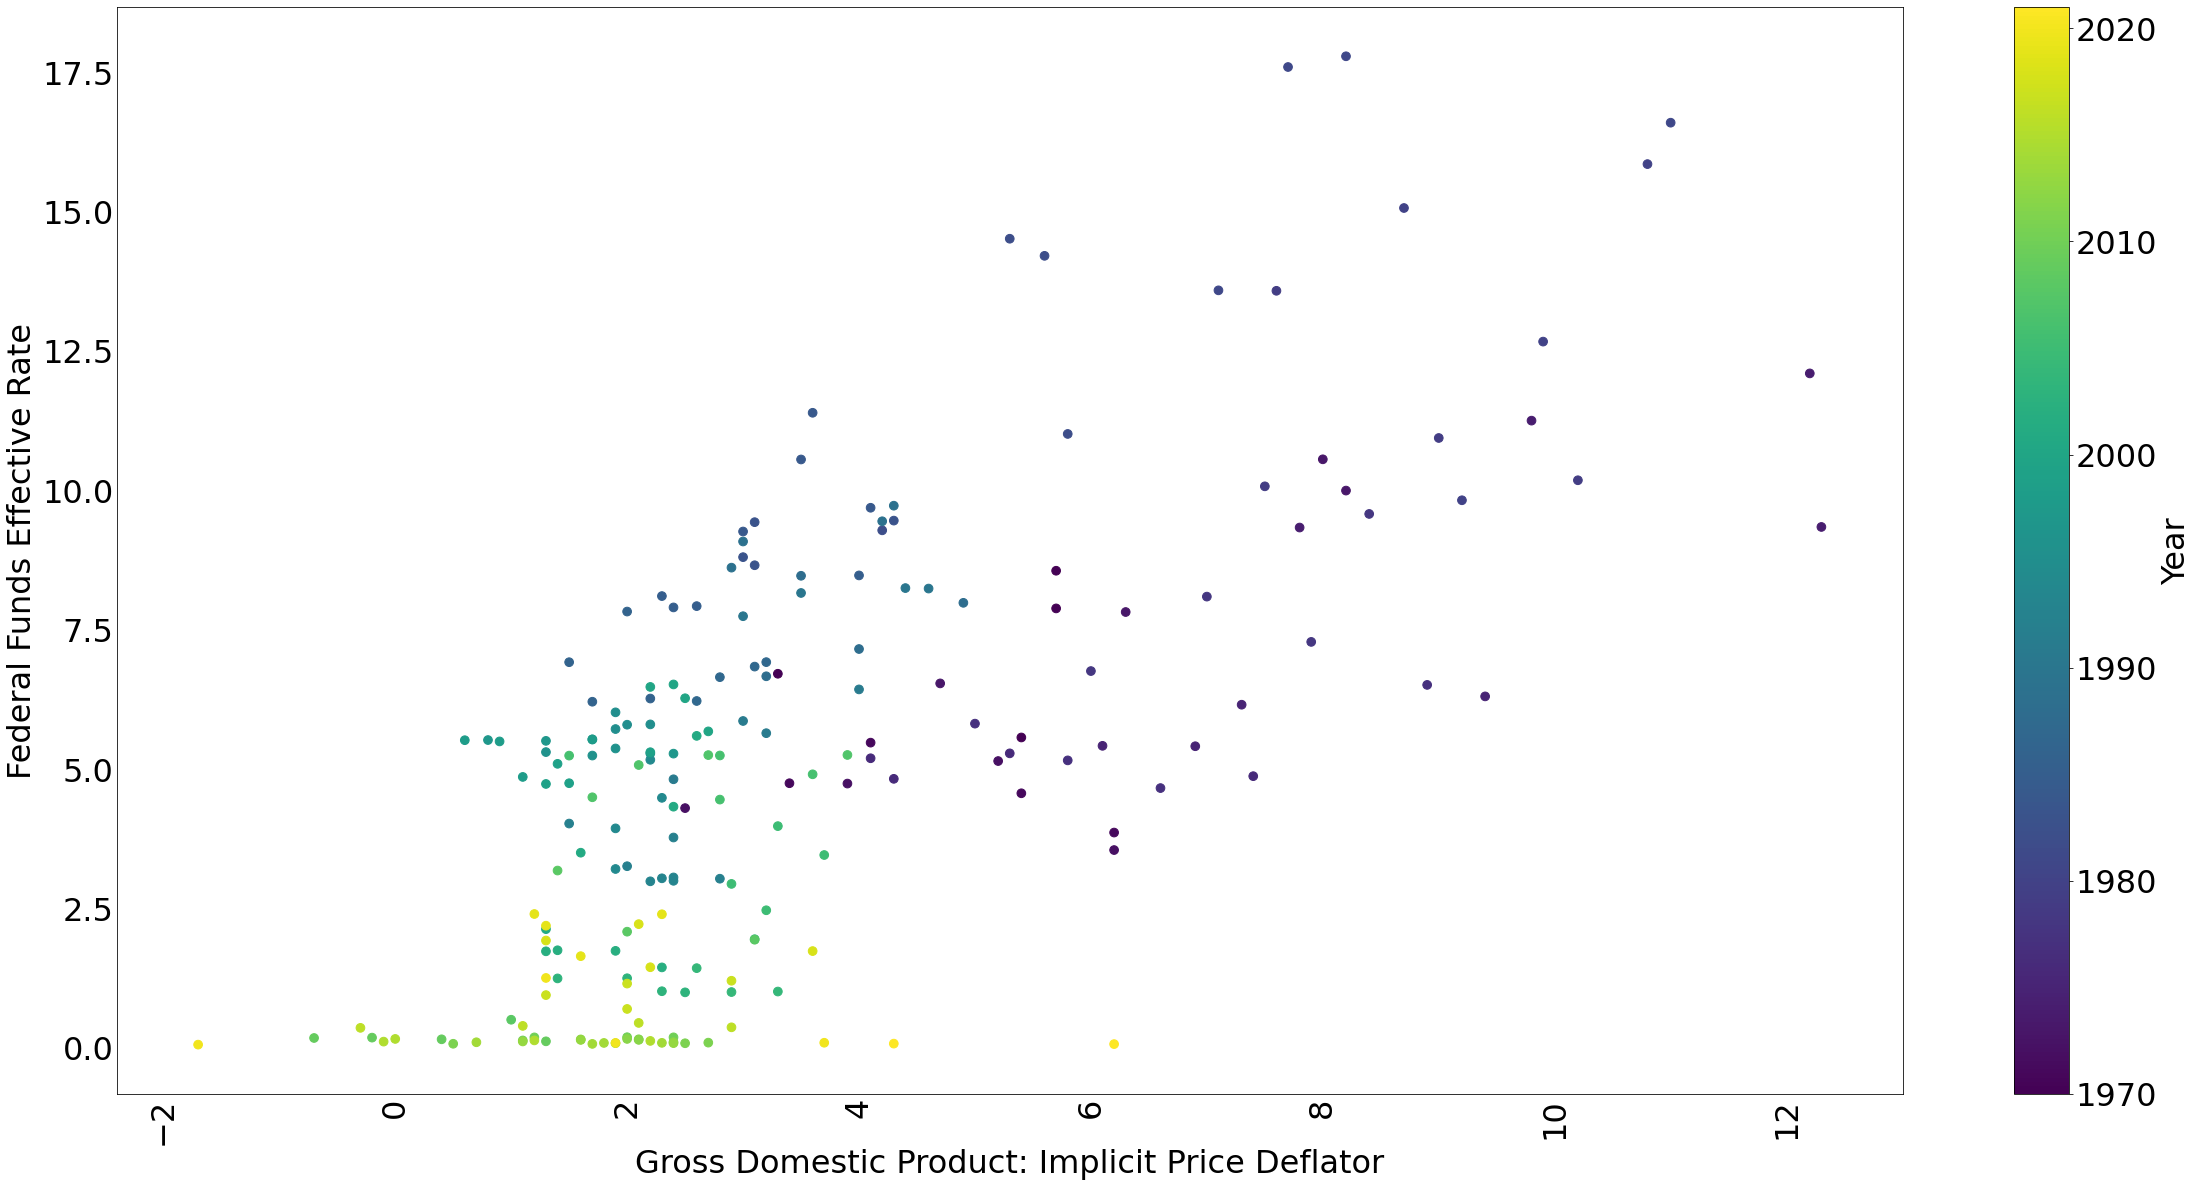

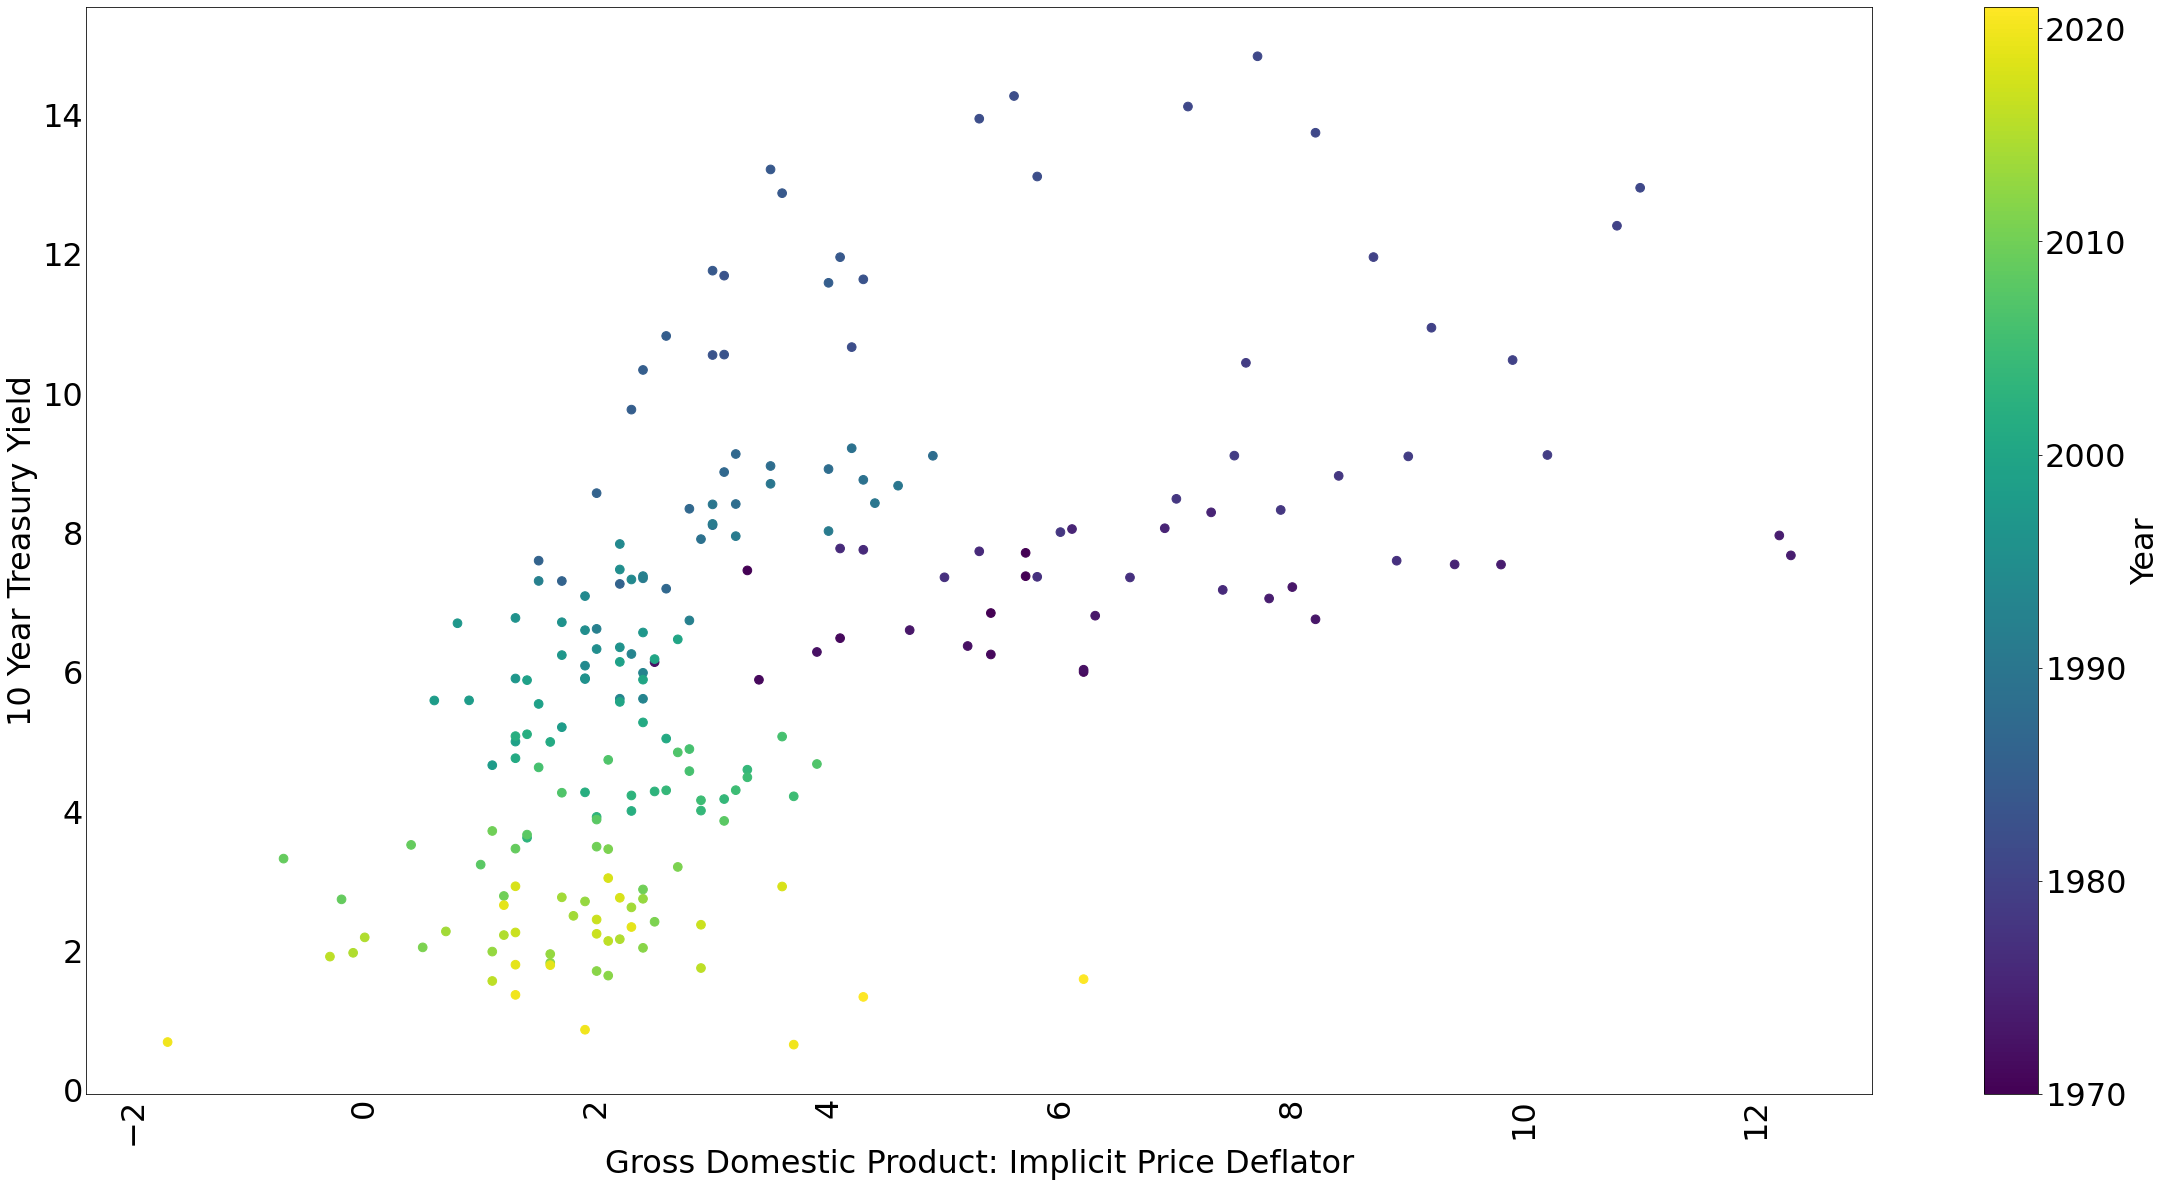

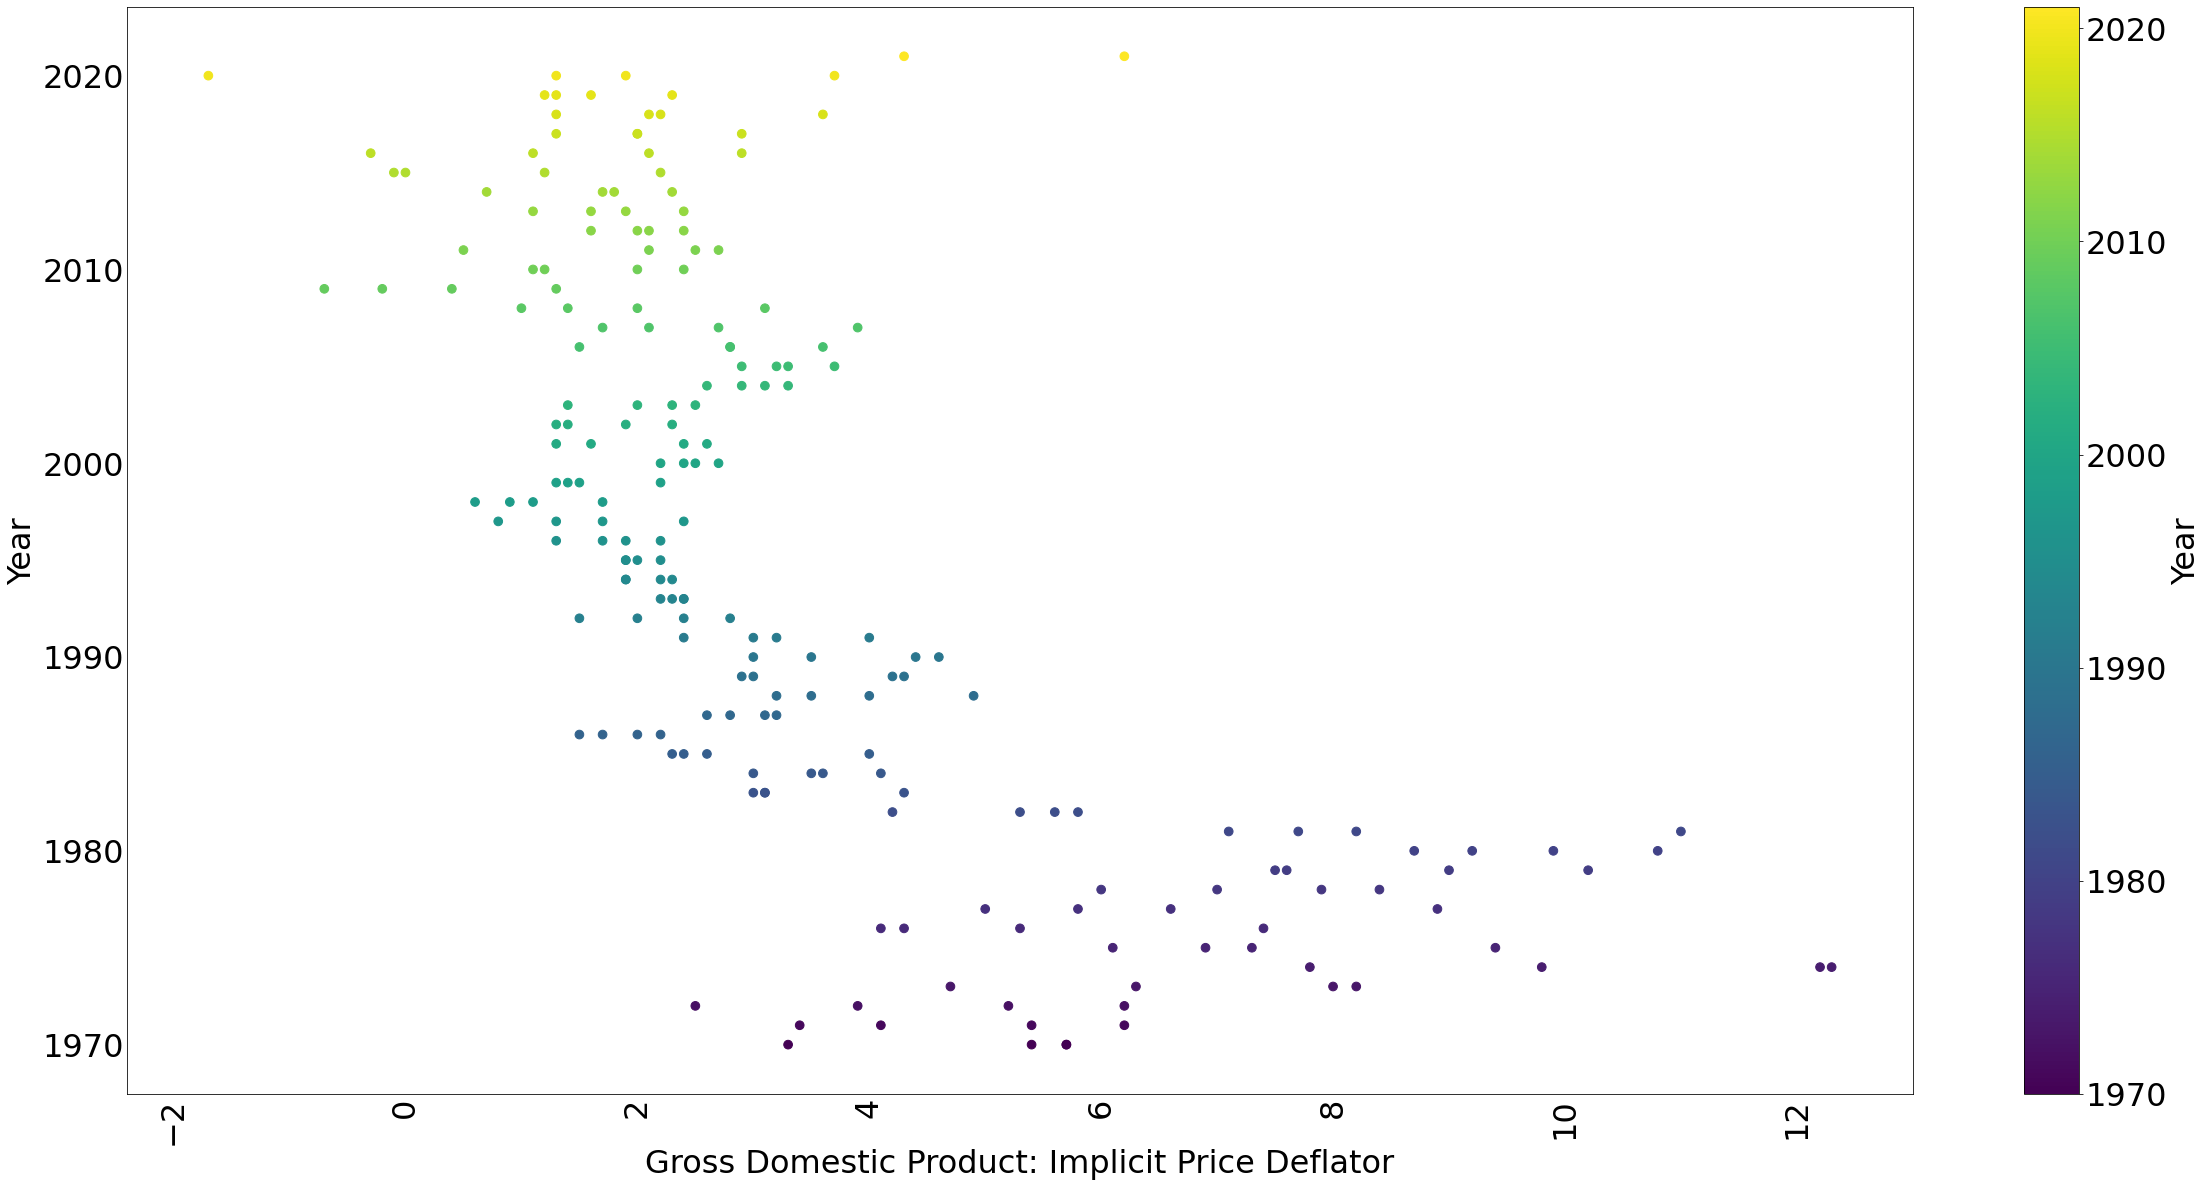

In [7]:
plot_scatter(rate_data,
             figsize = (40,20),
             pp = pp)

In [8]:
pp.close()

### These variables are related because M2 includes M1 and savings, small time deposits, and shares in money market mutual funds. These variable when they increase tend to increase the GDP growth rate as when there is more money in the economy businesses can grow and thrive, also increases inflation but that also effect GDP growth.

In [9]:
money_codes = {"M2":"WM2NS",
               "M1":"WM1NS",
               "Gross Domestic Product":"GDP"}

money_data = gather_data(data_codes = money_codes, 
                   start = start, 
                   end = end,
                   freq = "Q")

money_data = money_data.dropna(how = "any", axis = 0)
money_data

,M2,M1,Gross Domestic Product
DATE,,,
1980-12-31,1601.088889,415.115385,2985.557
1981-03-31,1617.776923,411.669231,3124.206
1981-06-30,1661.953846,423.938462,3162.532
1981-09-30,1694.761538,426.946154,3260.609
1981-12-31,1740.861538,436.330769,3280.818
...,...,...,...
2020-06-30,17663.923077,12780.715385,19477.444
2020-09-30,18390.130769,16906.738462,21138.574
2020-12-31,18979.415385,17612.923077,21477.597


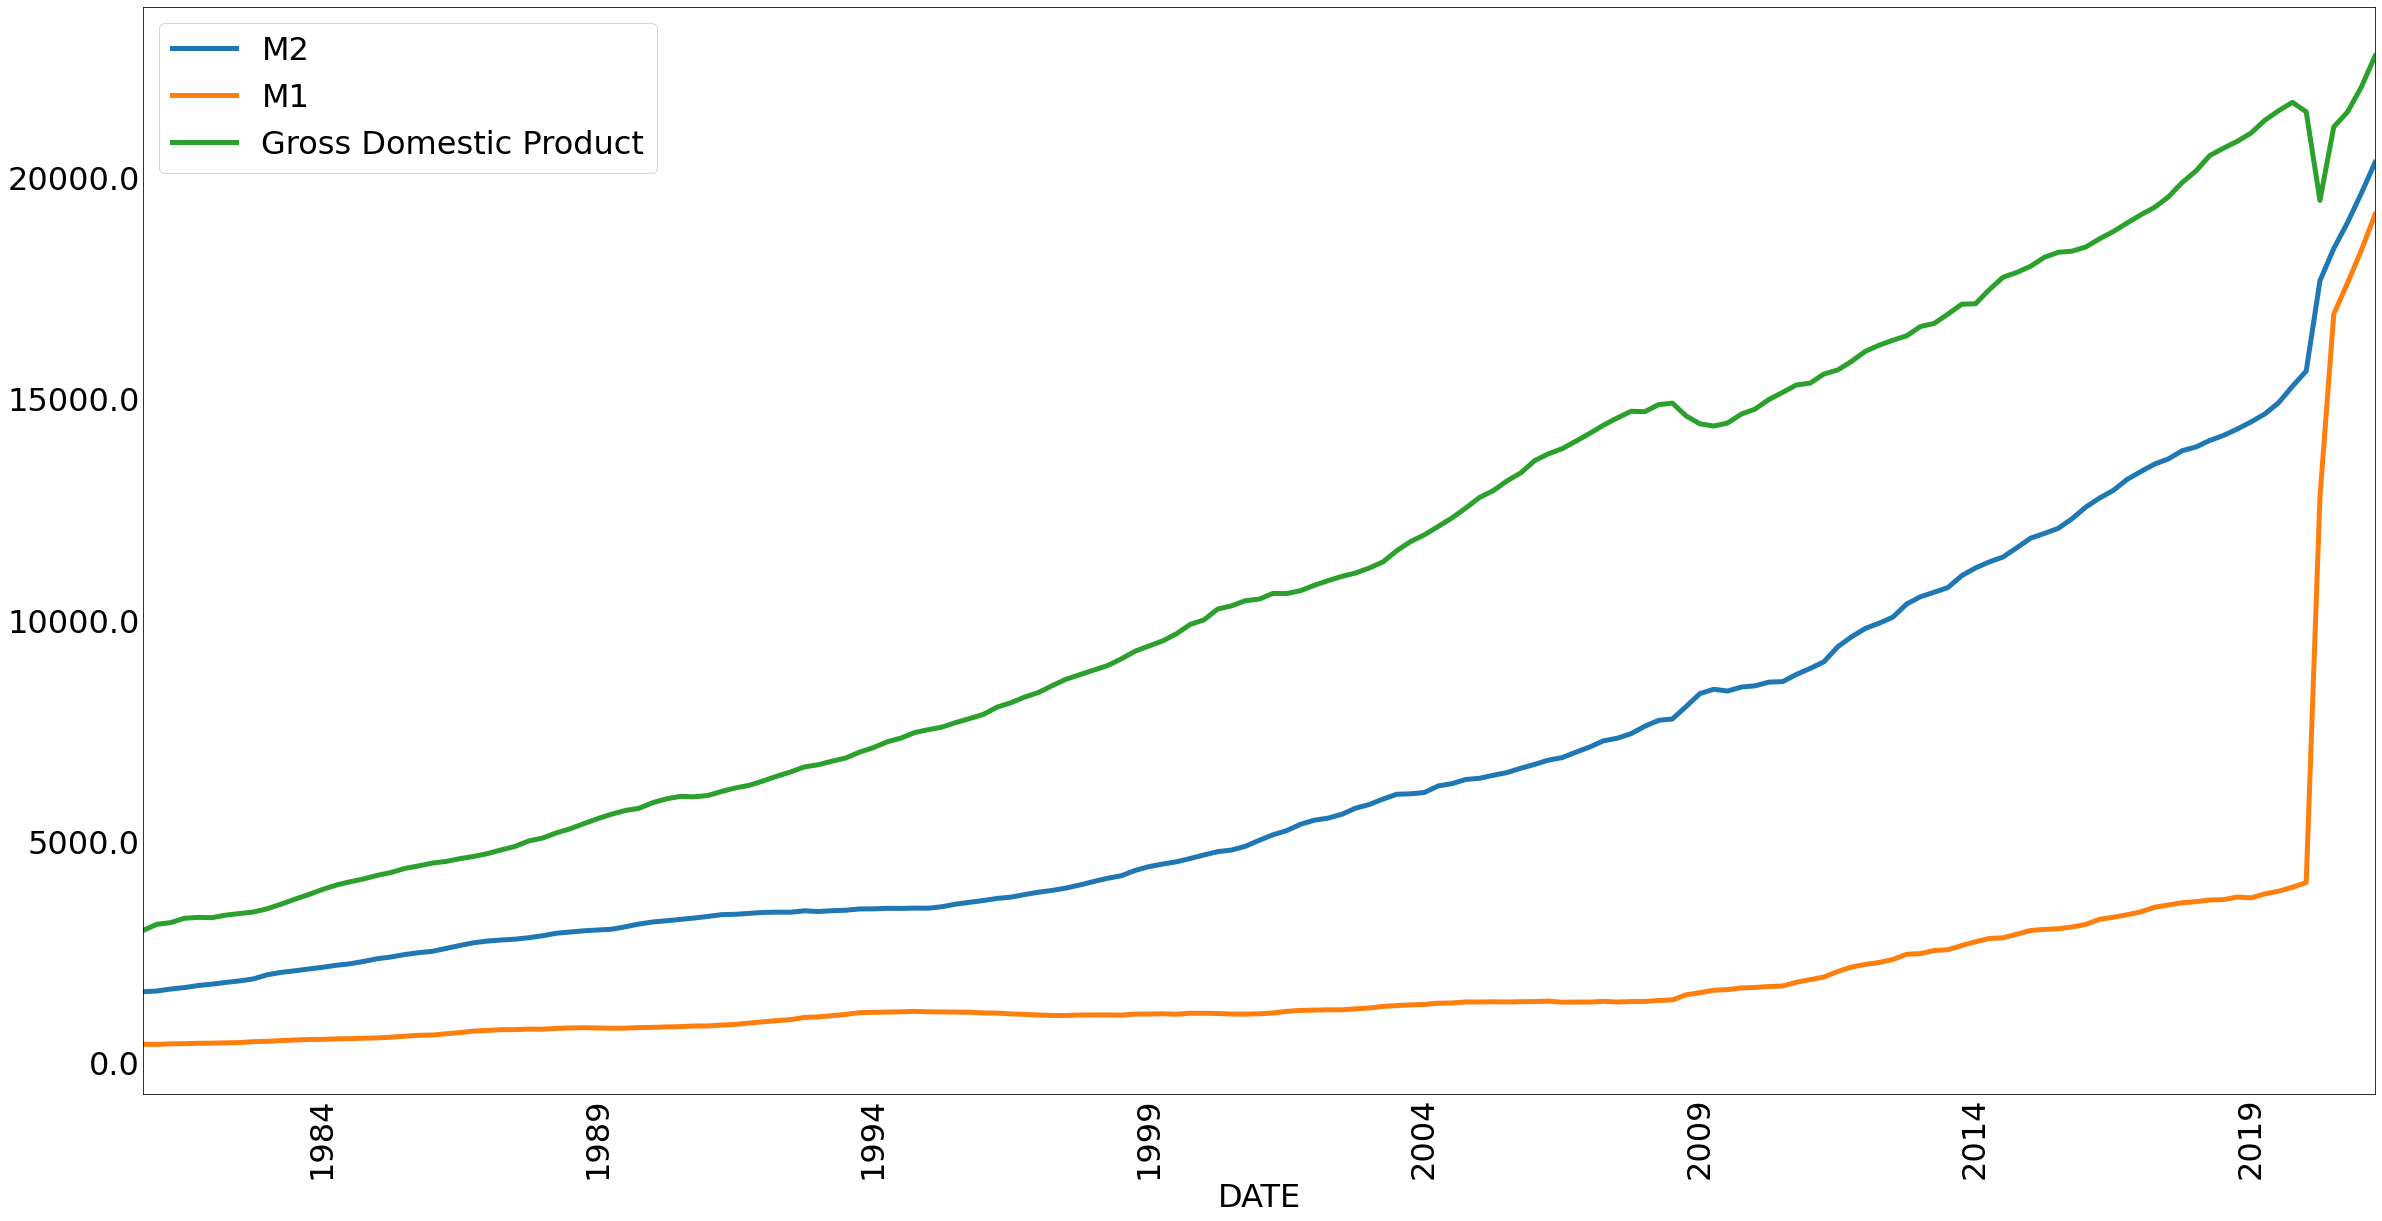

In [10]:
plt.rcParams.update({"font.size":32})
pp = PdfPages("Money.pdf")
plot_lines(money_data, 
           linewidth = 5, 
           figsize = (40, 20), 
           pp = pp)

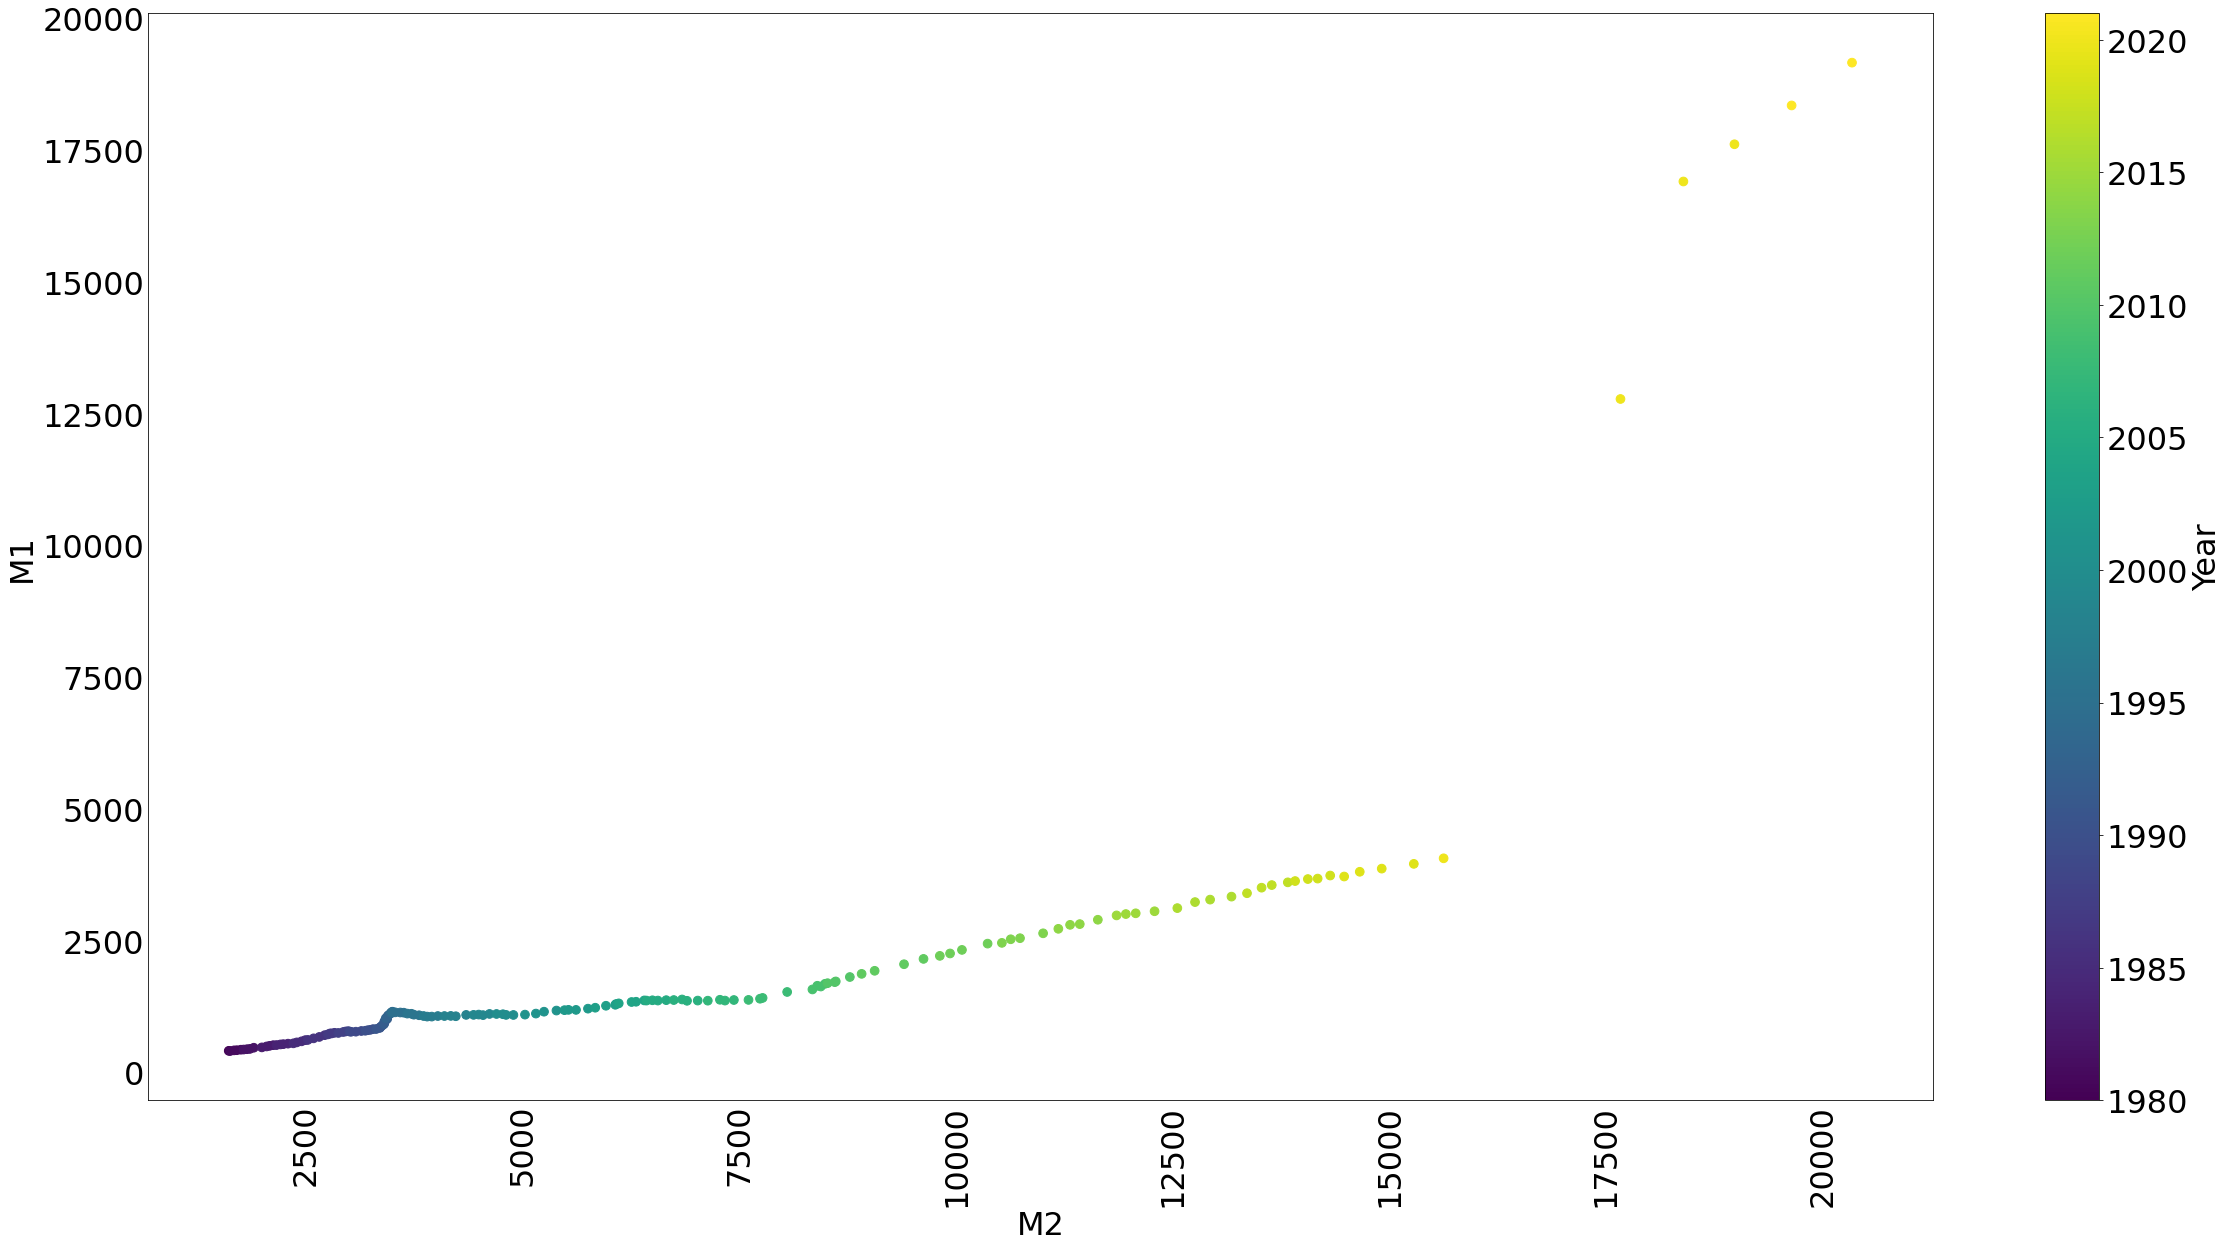

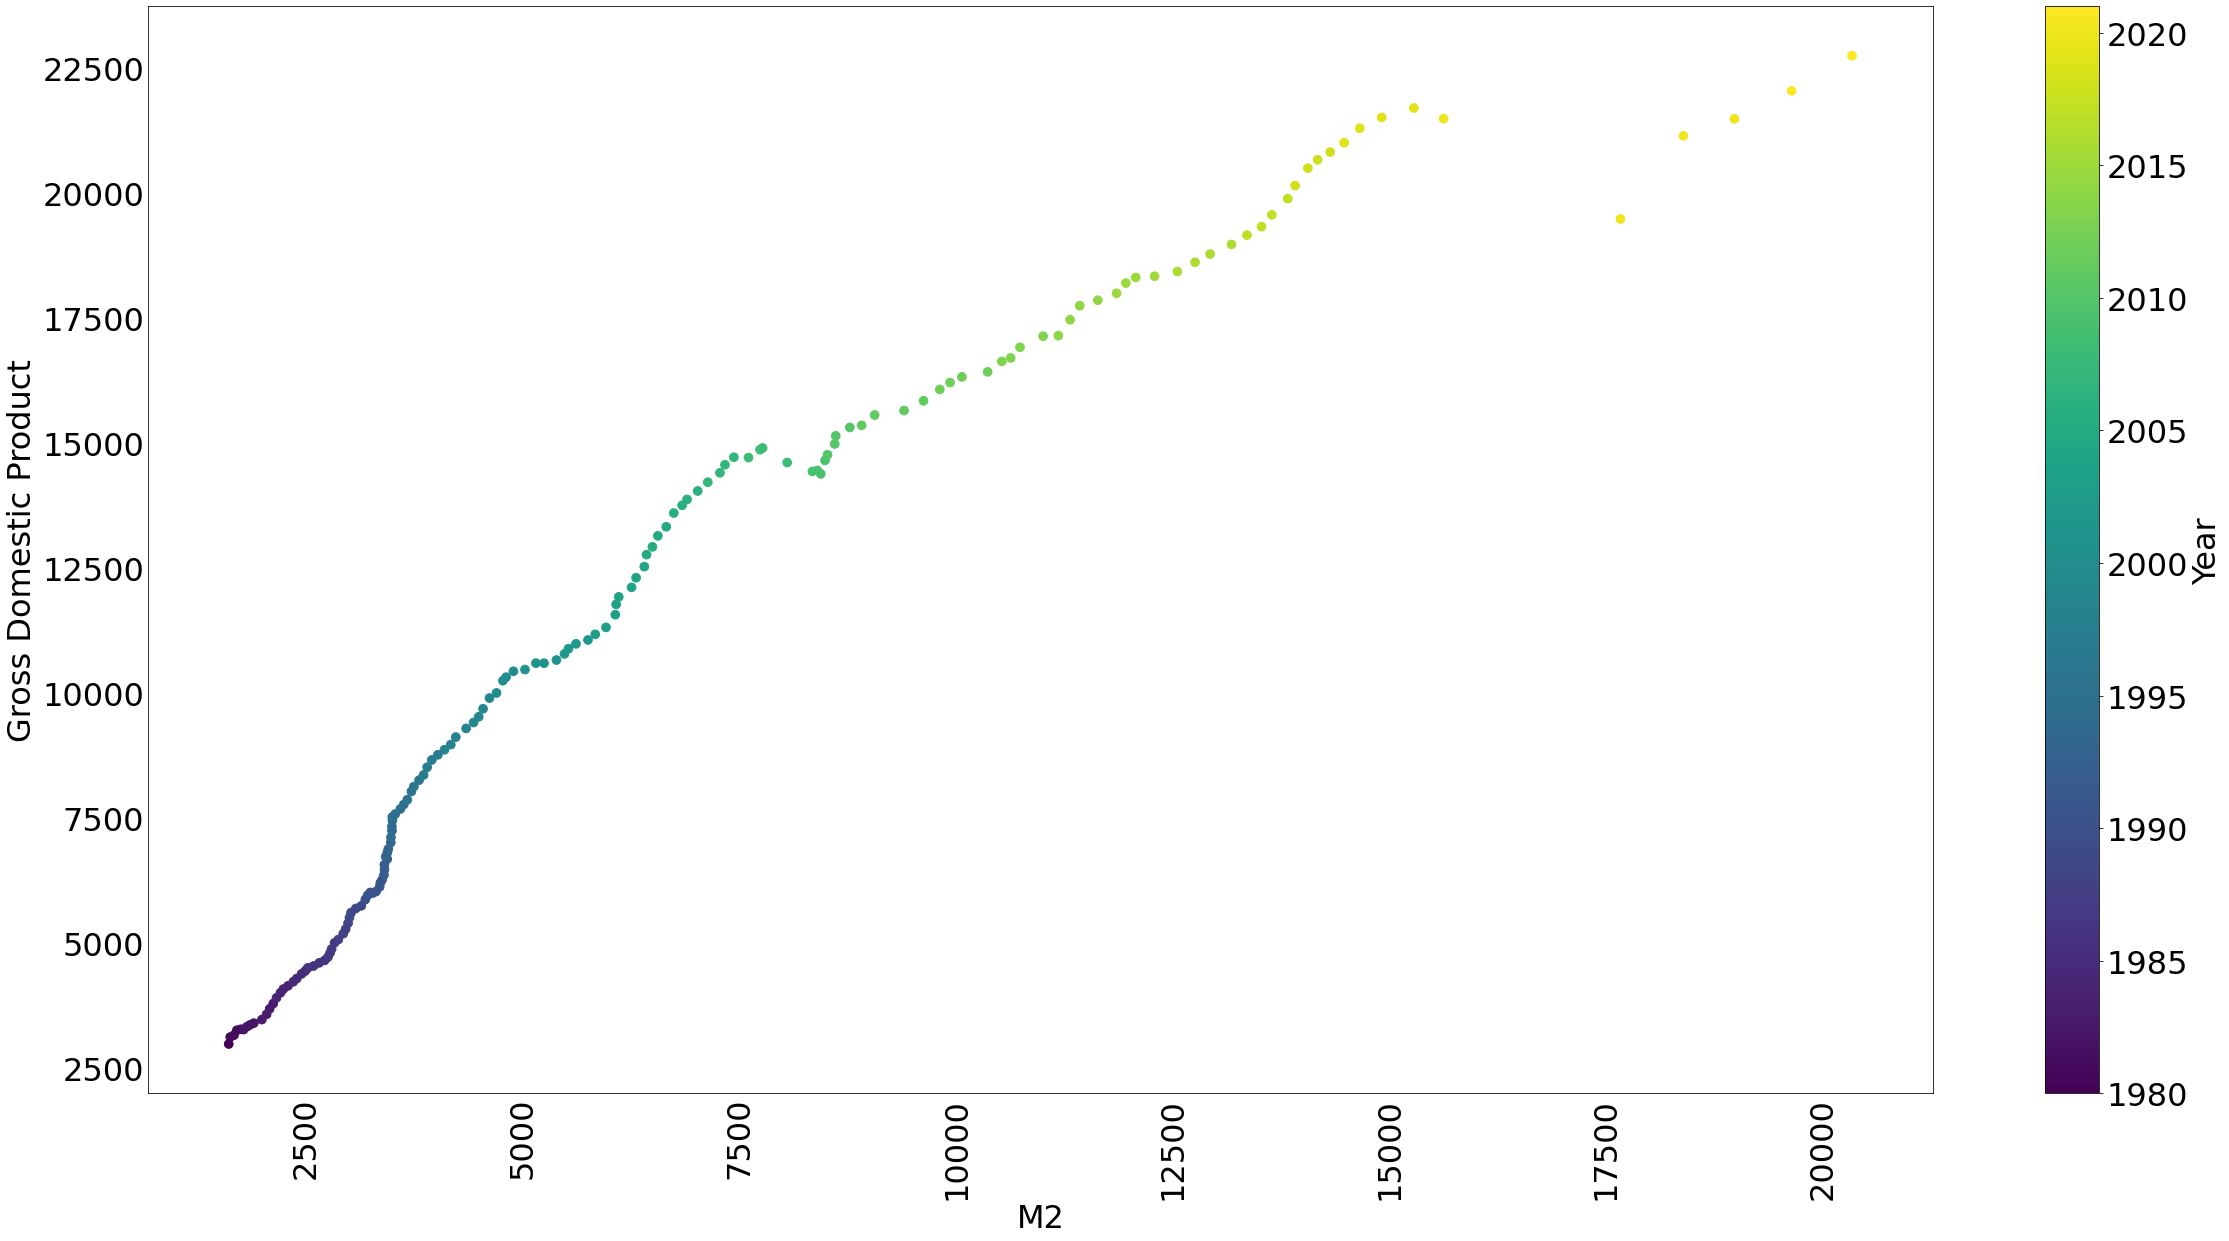

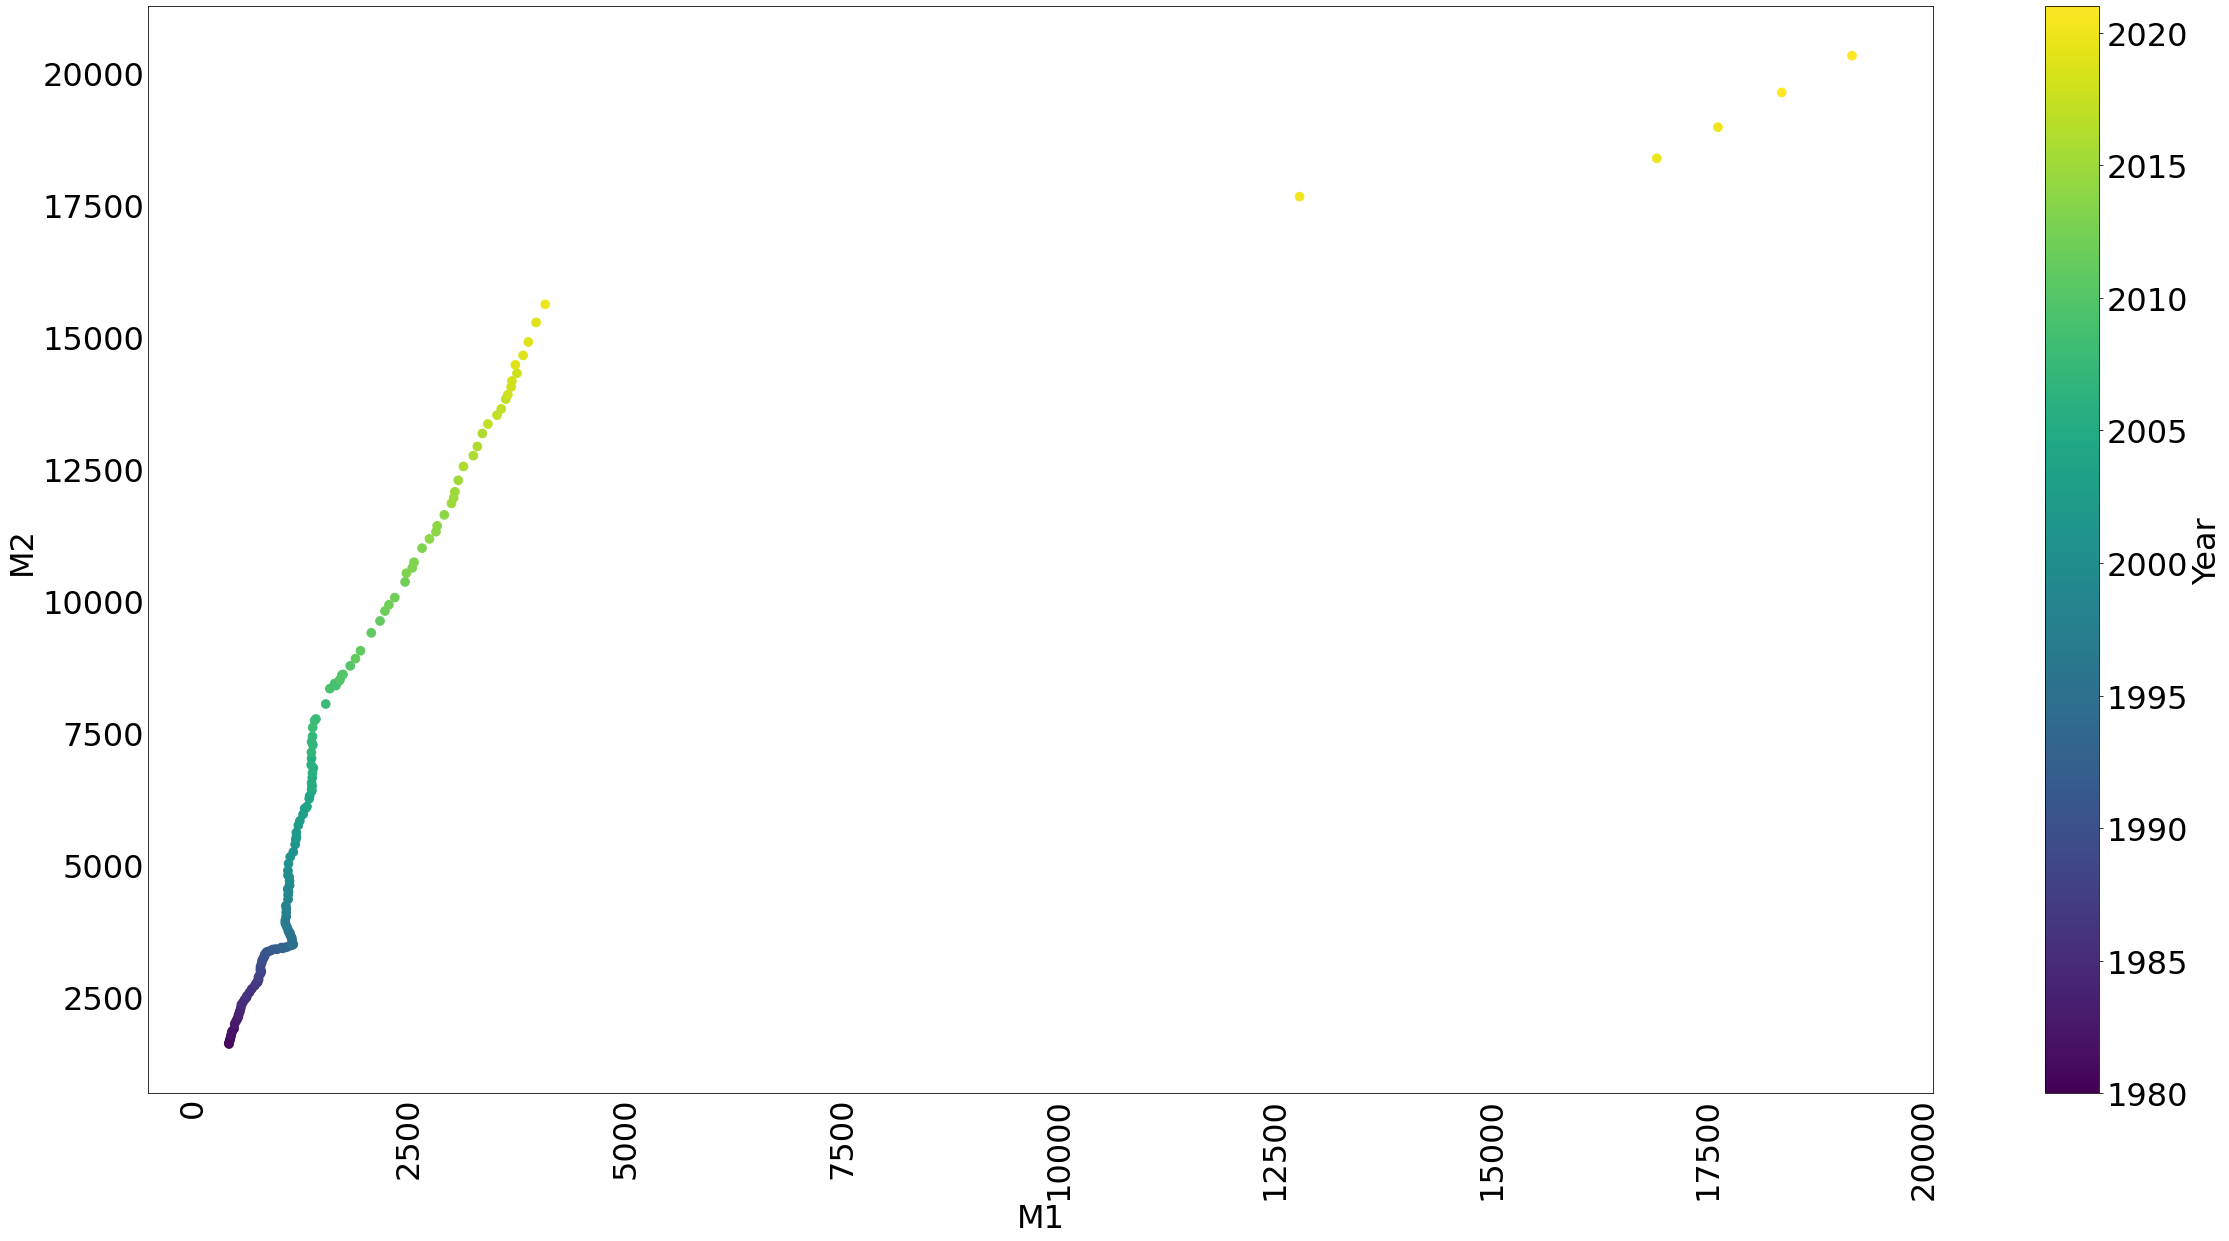

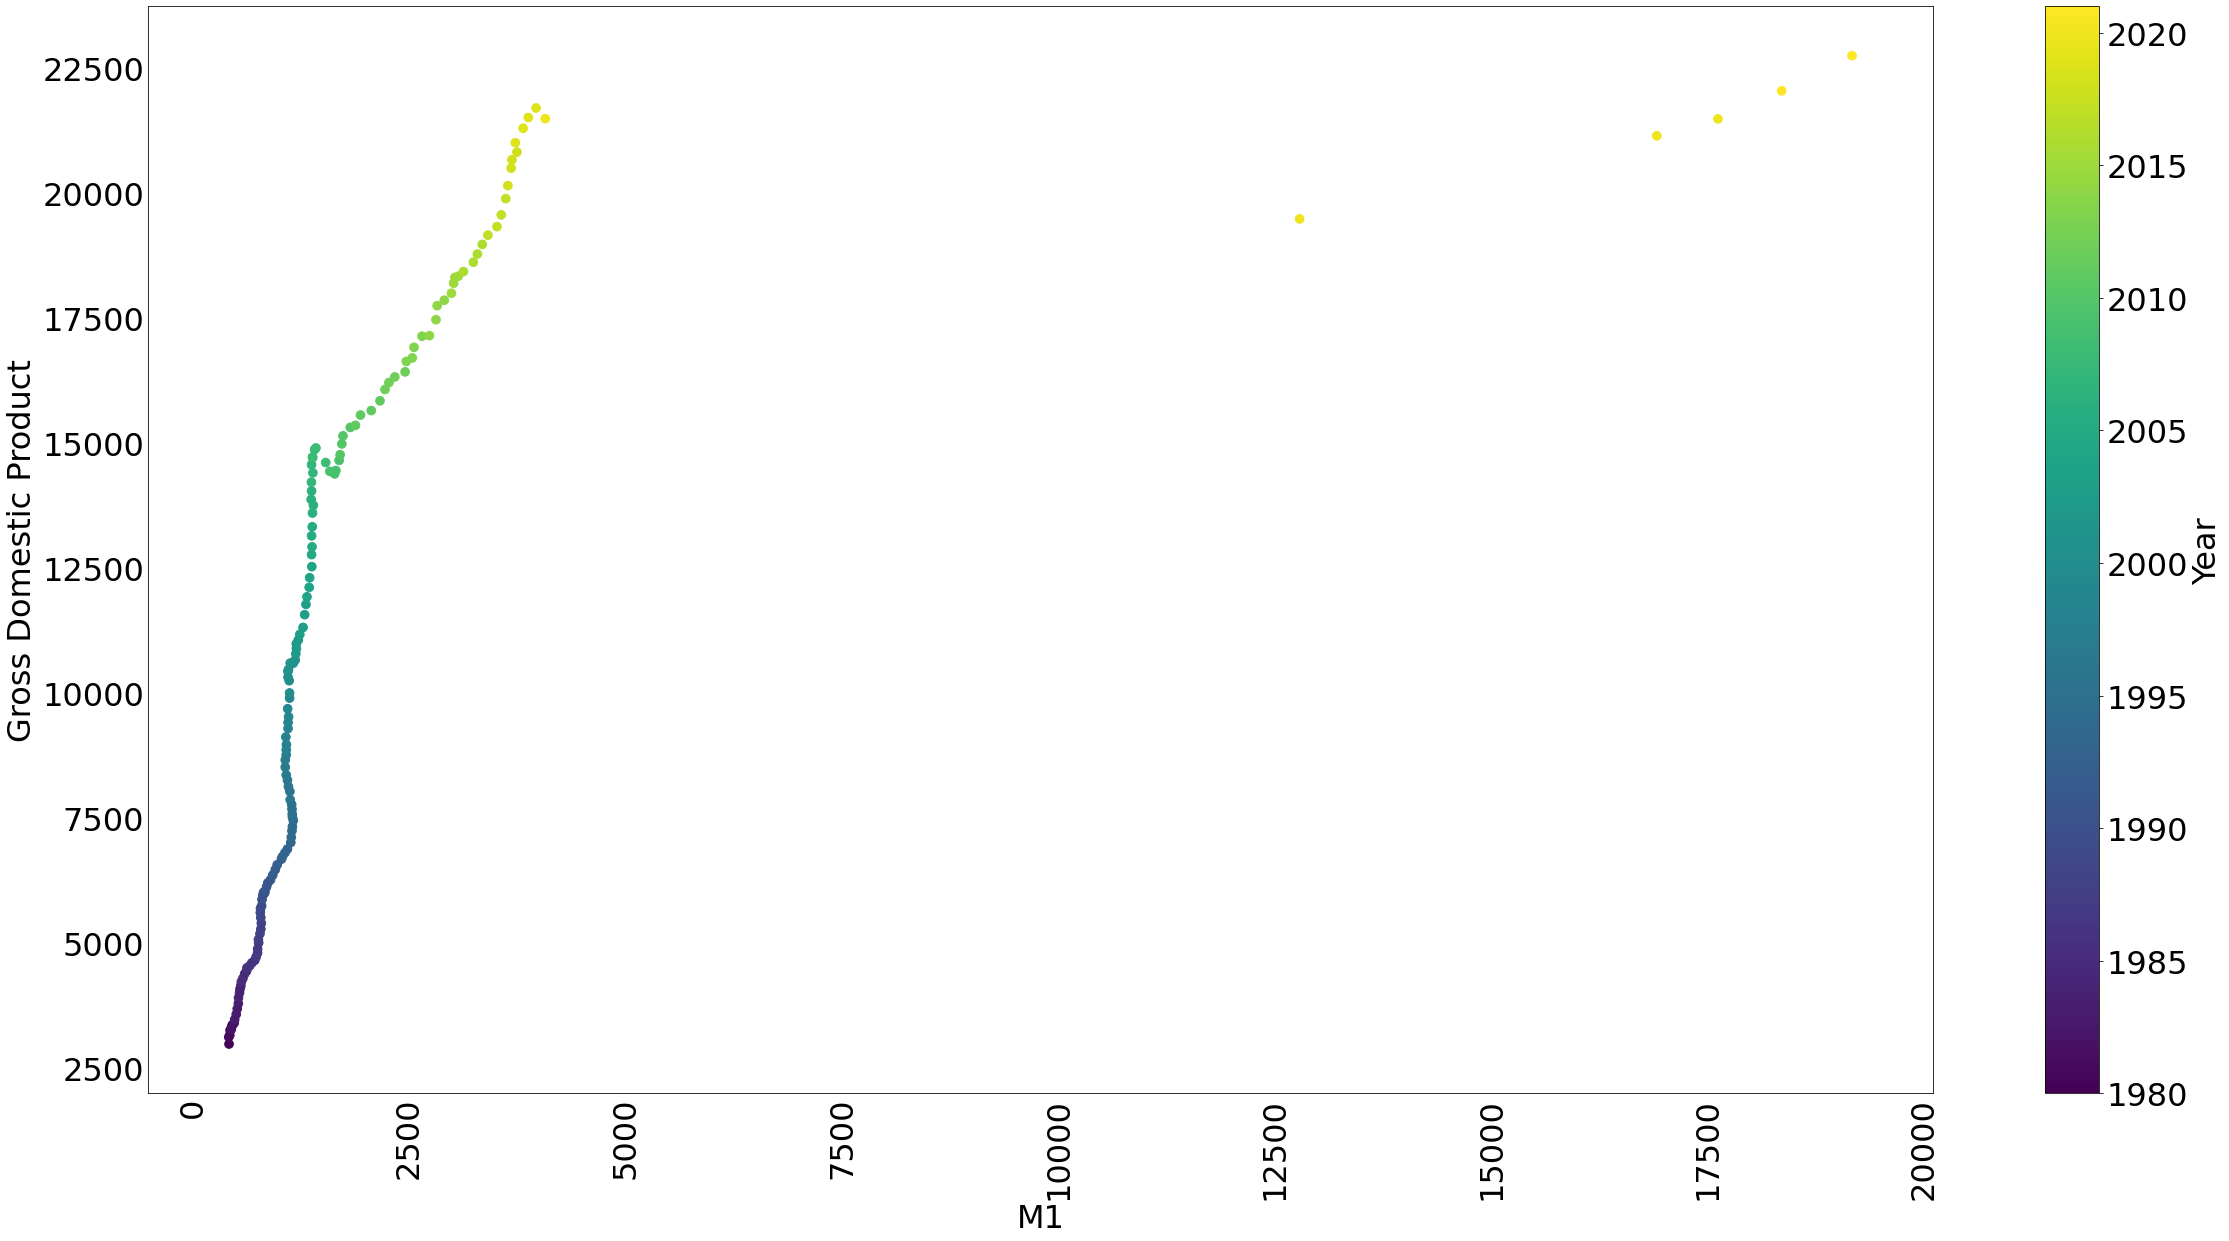

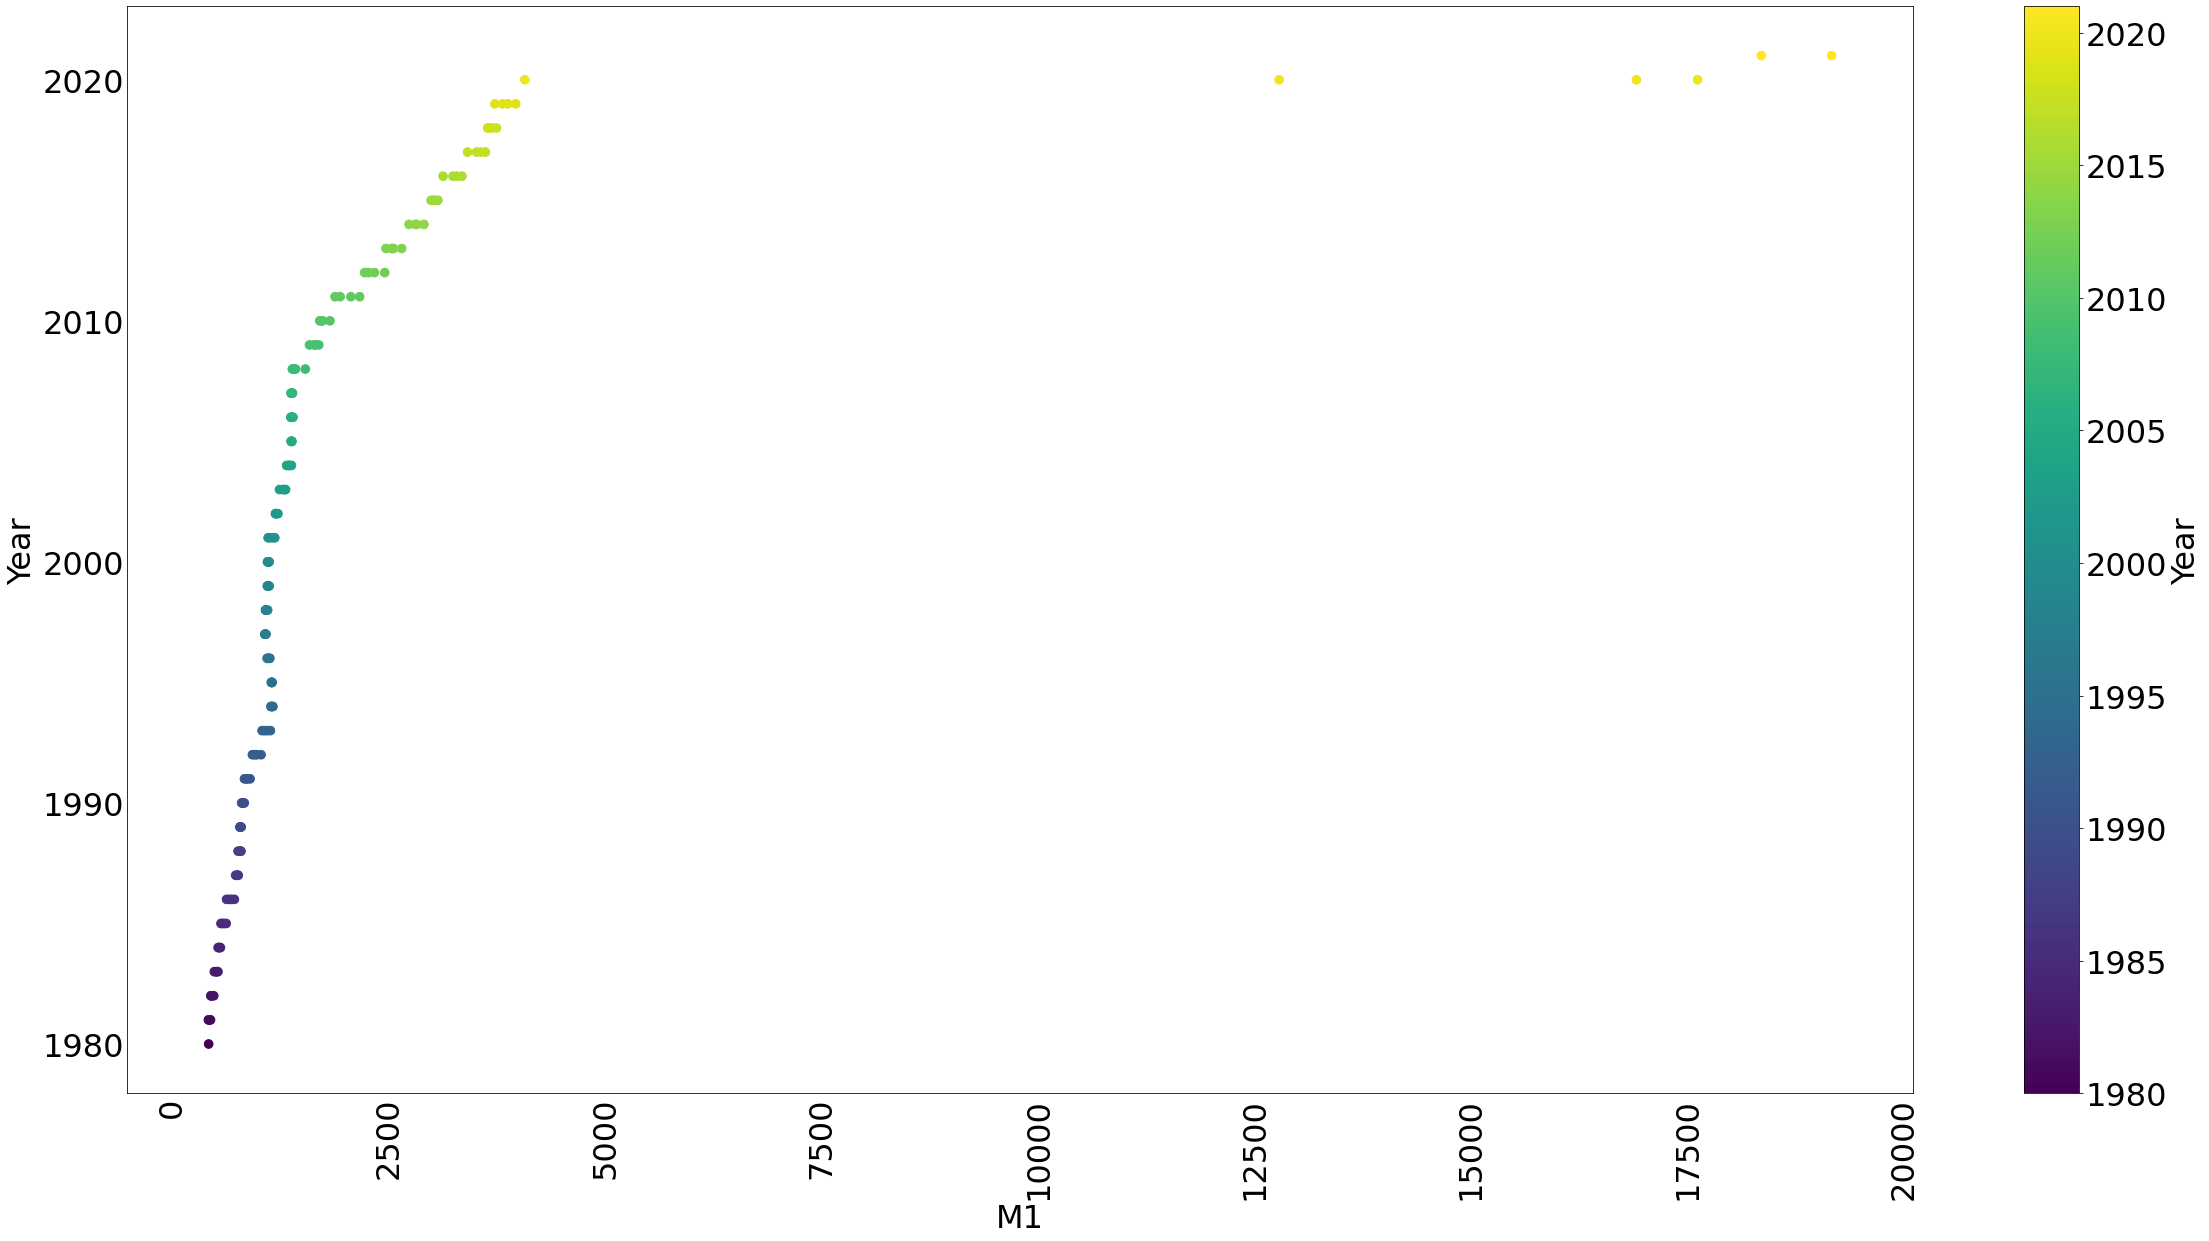

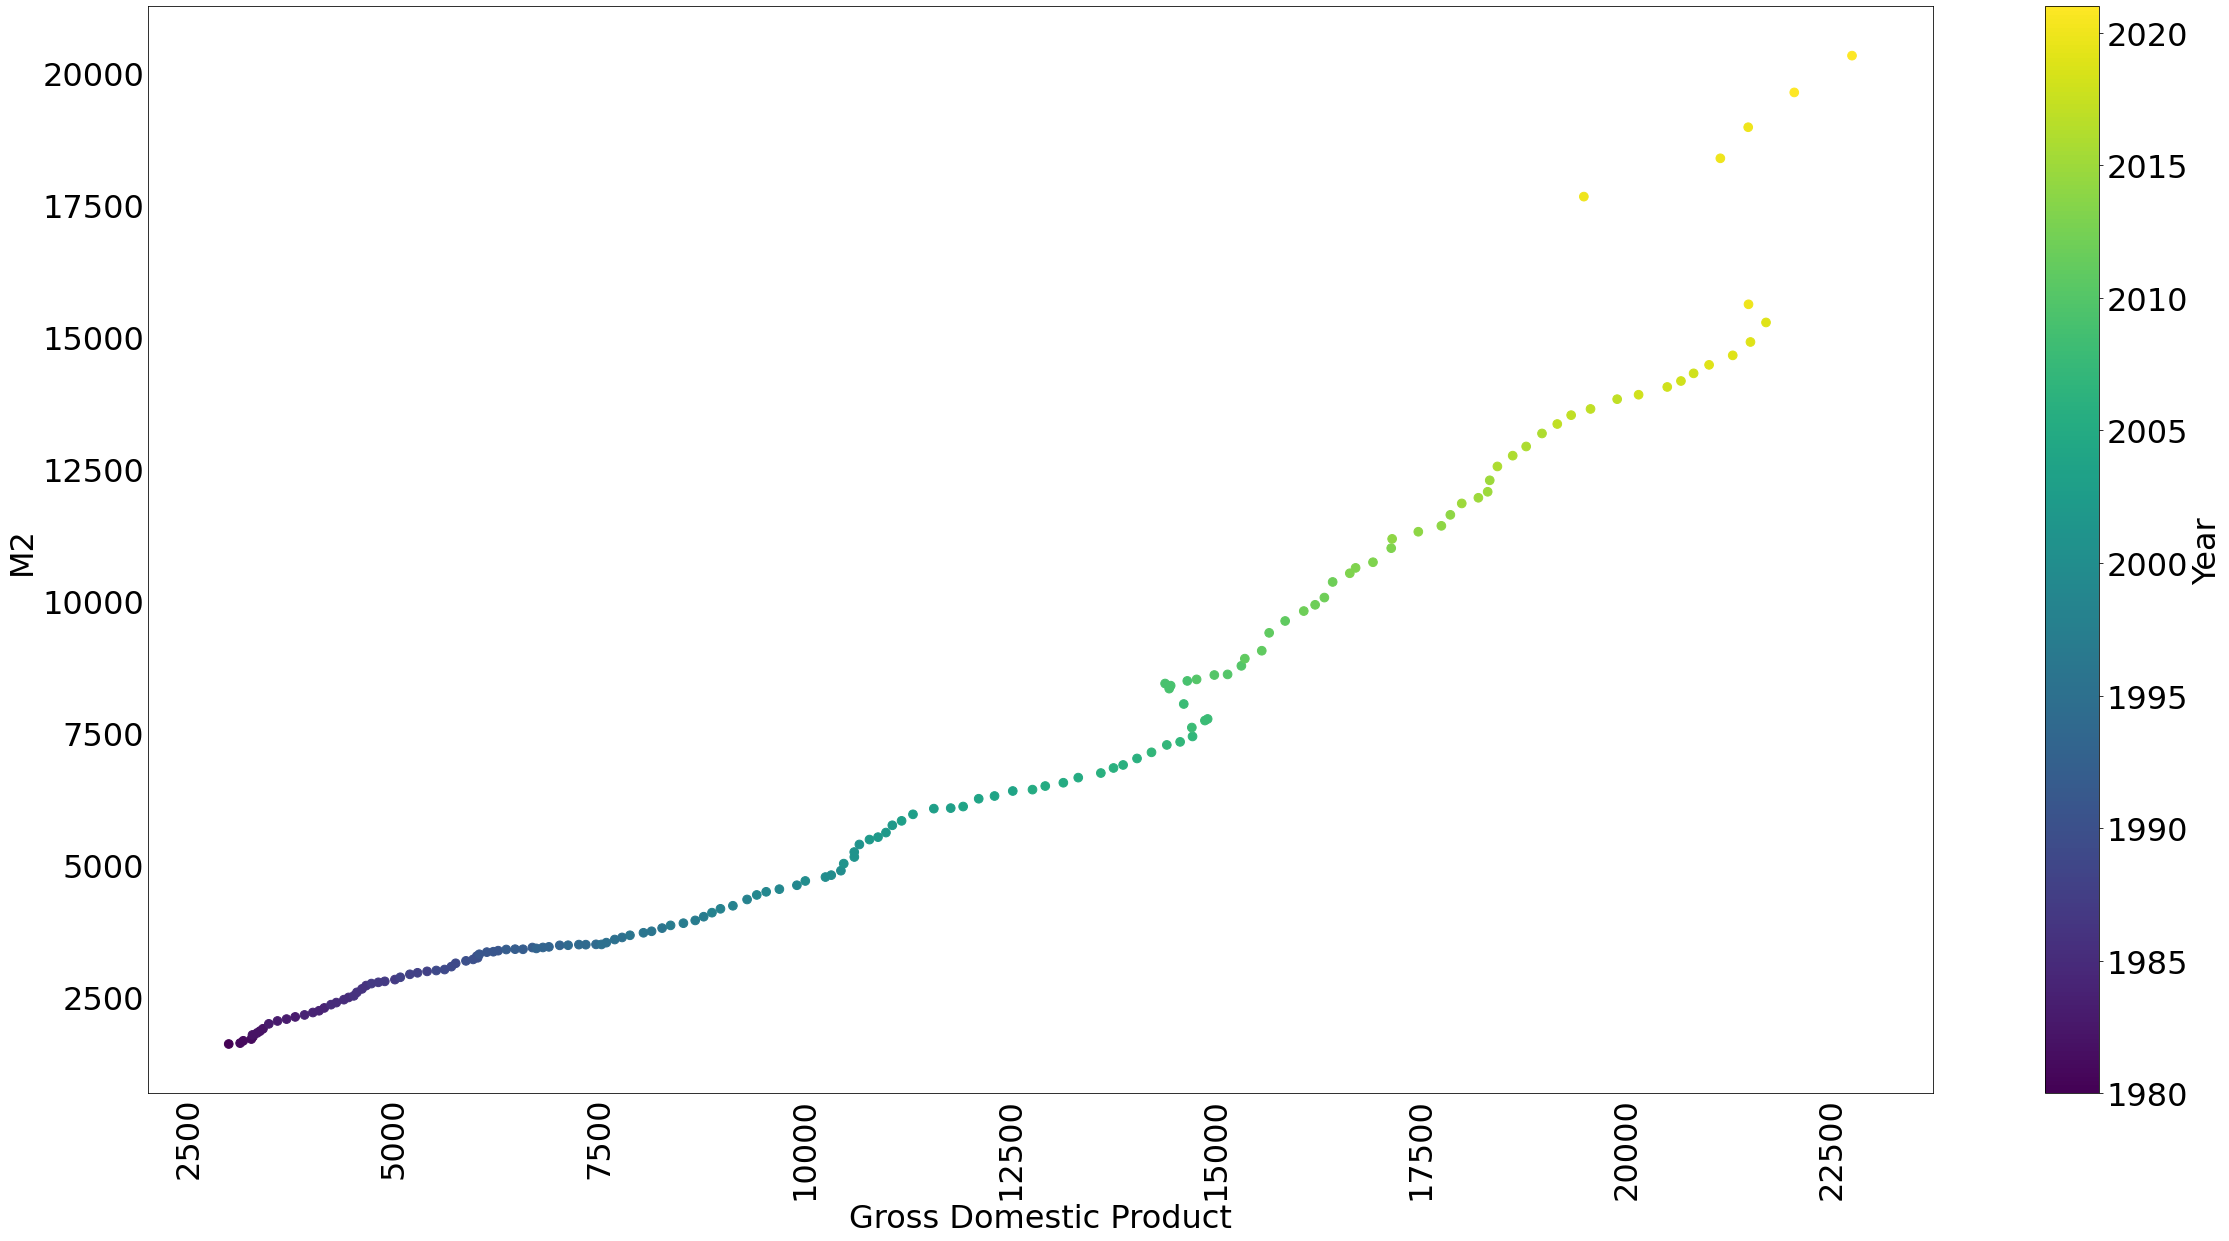

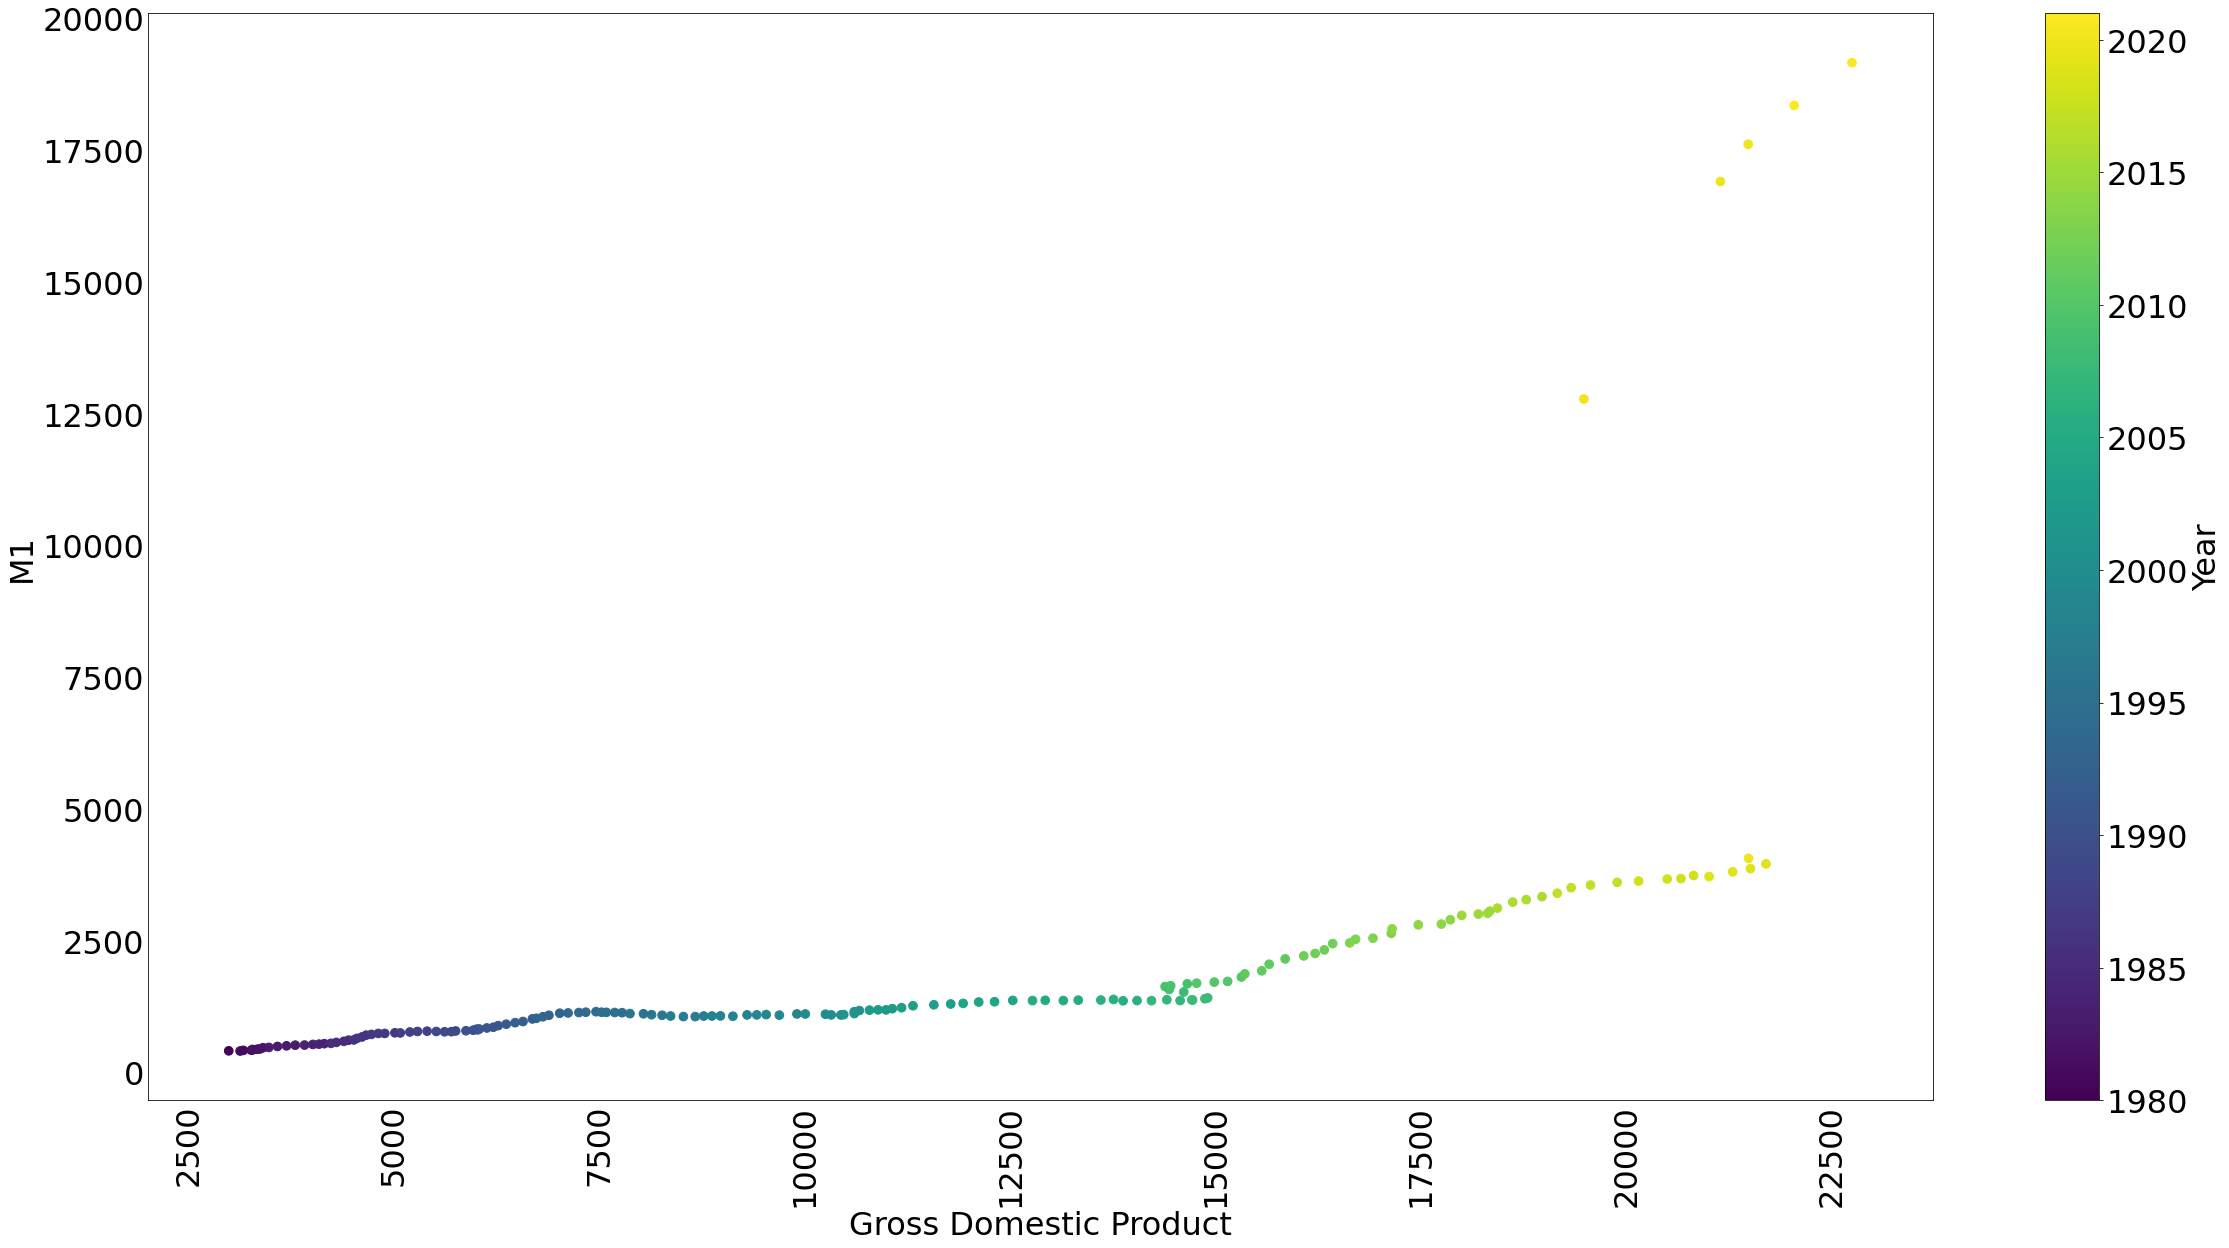

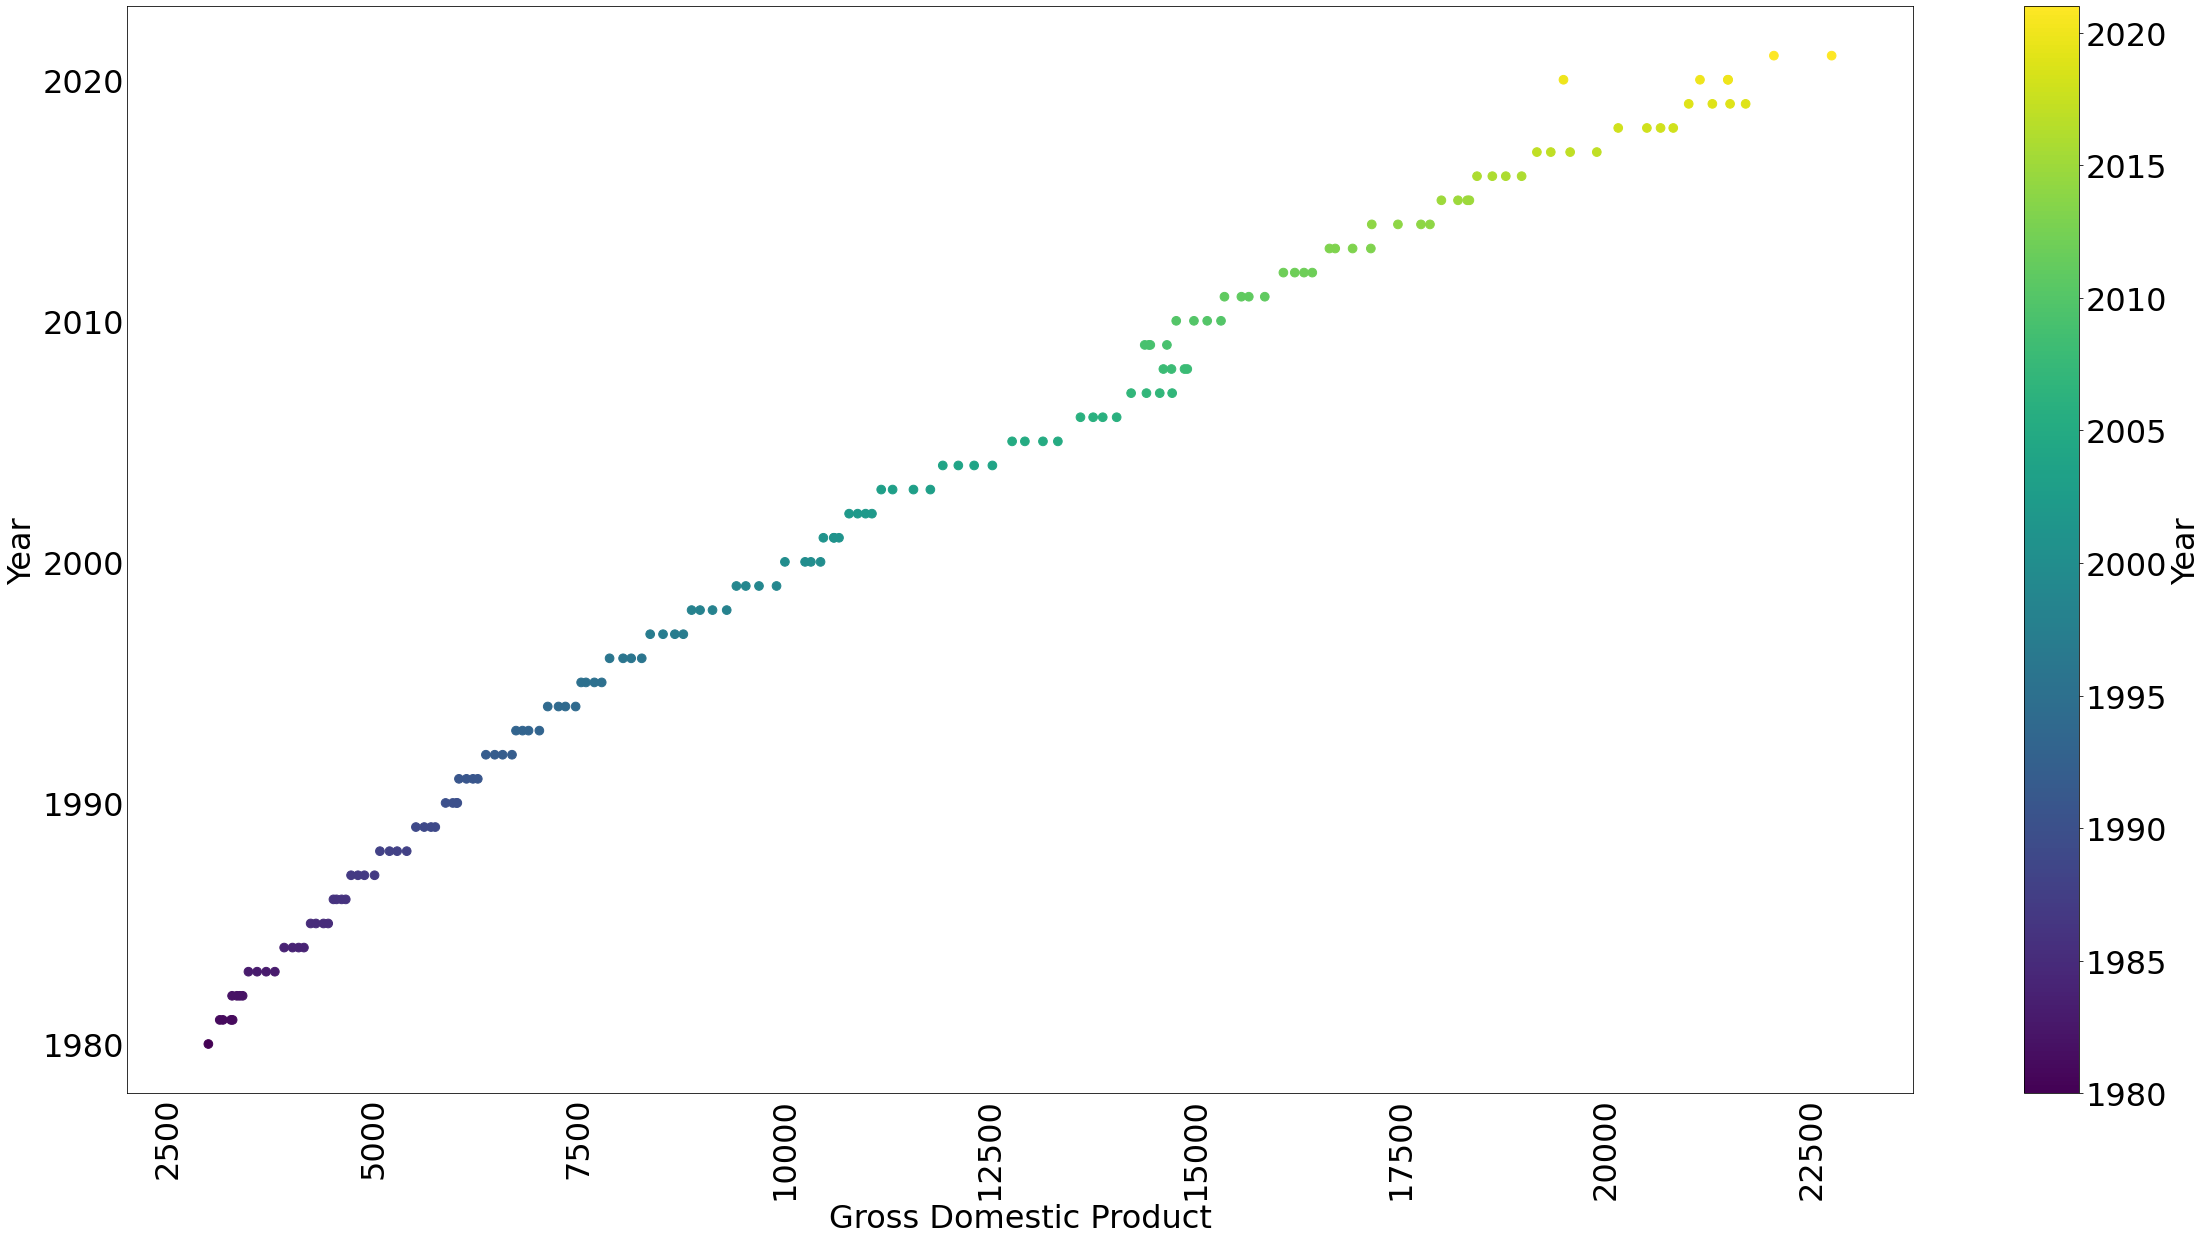

In [11]:
plot_scatter(money_data,
             figsize = (40,20),
             pp = pp)

In [12]:
pp.close()

2. Create a correlation matrix plot for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

In [13]:
start = datetime.datetime(1947,1,1)
corr_codes = {"Nominal GDP":"GDP",
              "Real GDP":"GDPC1",
              "CPI":"CPIAUCSL",
              "Currency In Circulation":"CURRCIR"}

corr_data = gather_data(data_codes = corr_codes, 
                   start = start, 
                   end = end,
                   freq = "Q")

corr_data = corr_data.dropna(how = "any", axis = 0)
corr_data

,Nominal GDP,Real GDP,CPI,Currency In Circulation
DATE,,,,
1947-03-31,243.164,2034.450,21.700000,28.372000
1947-06-30,245.968,2029.024,22.010000,28.193000
1947-09-30,249.585,2024.834,22.490000,28.388333
1947-12-31,259.745,2056.508,23.126667,28.727667
1948-03-31,265.742,2087.442,23.616667,28.143667
...,...,...,...,...
2020-06-30,19477.444,17258.205,256.472000,1924.159667
2020-09-30,21138.574,18560.774,259.421333,2003.012667
2020-12-31,21477.597,18767.778,260.983000,2055.453333


In [14]:
corr_matrix = corr_data.corr()
corr_matrix

,Nominal GDP,Real GDP,CPI,Currency In Circulation
Nominal GDP,1.000000,0.982423,0.978966,0.974116
Real GDP,0.982423,1.000000,0.992395,0.925575
CPI,0.978966,0.992395,1.000000,0.917179
Currency In Circulation,0.974116,0.925575,0.917179,1.000000


In [15]:
import numpy as np
for key in corr_data:
    corr_data[key + " yoy % Change"] = corr_data[key].pct_change(4)
corr_data

,Nominal GDP,Real GDP,CPI,Currency In Circulation,Nominal GDP yoy % Change,Real GDP yoy % Change,CPI yoy % Change,Currency In Circulation yoy % Change
DATE,,,,,,,,
1947-03-31,243.164,2034.450,21.700000,28.372000,NaN,NaN,NaN,NaN
1947-06-30,245.968,2029.024,22.010000,28.193000,NaN,NaN,NaN,NaN
1947-09-30,249.585,2024.834,22.490000,28.388333,NaN,NaN,NaN,NaN
1947-12-31,259.745,2056.508,23.126667,28.727667,NaN,NaN,NaN,NaN
1948-03-31,265.742,2087.442,23.616667,28.143667,0.092851,0.026047,0.088326,-0.008048
...,...,...,...,...,...,...,...,...
2020-06-30,19477.444,17258.205,256.472000,1924.159667,-0.085105,-0.090837,0.004302,0.110862
2020-09-30,21138.574,18560.774,259.421333,2003.012667,-0.017040,-0.028875,0.012606,0.142691
2020-12-31,21477.597,18767.778,260.983000,2055.453333,-0.009996,-0.022629,0.012113,0.152732


In [16]:
corr_columns = ["Nominal GDP yoy % Change",
                "Real GDP yoy % Change",
                "CPI yoy % Change",
                "Currency In Circulation yoy % Change"]
yoy_corr_matrix = corr_data[corr_columns].corr()
yoy_corr_matrix

,Nominal GDP yoy % Change,Real GDP yoy % Change,CPI yoy % Change,Currency In Circulation yoy % Change
Nominal GDP yoy % Change,1.000000,0.767709,0.568595,0.122100
Real GDP yoy % Change,0.767709,1.000000,-0.046710,-0.092208
CPI yoy % Change,0.568595,-0.046710,1.000000,0.318286
Currency In Circulation yoy % Change,0.122100,-0.092208,0.318286,1.000000
